# UK Traffic Data Analysis

Data Source- https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data

# Introduction
The general expectation of the public is that the police, responsible for managing law and order should be present at the scene of the accident. In some cases, however, the police may not be able to show up to complete an accident report. This could be due to them being busy with more serious crimes or them determining that the accident is minor. Sometimes, major weather events can also pull officers away from responding to auto accidents. 

In this notebook, I am attemptig to detemine which models can be useful in helping to determine if a police officer is likely to show up to attend a scene of the accident. The models used are from the H2O open source package with hyper parameter tuning. 

In [1]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 13.0.1+9, mixed mode, sharing)
  Starting server from C:\Users\Admin\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Admin\AppData\Local\Temp\tmpl7lr19t6
  JVM stdout: C:\Users\Admin\AppData\Local\Temp\tmpl7lr19t6\h2o_Admin_started_from_python.out
  JVM stderr: C:\Users\Admin\AppData\Local\Temp\tmpl7lr19t6\h2o_Admin_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Asia/Singapore
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.1
H2O cluster version age:,"28 days, 17 hours and 38 minutes"
H2O cluster name:,H2O_from_python_Admin_jnixya
H2O cluster total nodes:,1
H2O cluster free memory:,15.96 Gb
H2O cluster total cores:,16
H2O cluster allowed cores:,16
H2O cluster status:,"accepting new members, healthy"


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [4]:
accident_data = pd.read_csv('C:/Users/Admin/Desktop/DfTRoadSafety_Accidents_2014.csv')

# Dataset
The dataset in contains traffic accident data from the UK for the year 2014. The UK police forces collect data on every vehicle collision in the uk on a form called Stats19. Data from this form ends up at the DfT and is published at https://data.gov.uk/dataset/road-accidents-safety-data. This dataset provides information on a number of features that relate directly to the accident and are a mix of categorical and numeric data points. In this report, I aim to determine which conditions will result in a police officer attending the scene of the accident. The variable of interest is 'Did_Police_Officer_Attend_Scene_of_Accident and it is coded either 1 for Yes or 2 for No. While the data dictionary does mention an option 3, for accident being reported using a self completion form but that was not part of the data set and can hence be disregarded.

There are 146322 rows in the data with 32 separate columns. Additionally, there are 2 ways missing data can be coded, either 0 or -1. I check for the total count of missing values.

In [5]:
accident_data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201401BS70001,524600,179020,-0.206443,51.496345,1,3,2,1,09/01/2014,...,0,0,1,2,2,0,0,1,2,E01002814
1,201401BS70002,525780,178290,-0.189713,51.489523,1,3,2,1,20/01/2014,...,0,5,7,1,1,0,0,1,2,E01002894
2,201401BS70003,526880,178430,-0.173827,51.490536,1,3,2,1,21/01/2014,...,0,0,1,1,1,0,0,1,1,E01002822
3,201401BS70004,525580,179080,-0.192311,51.496668,1,3,1,1,15/01/2014,...,0,1,4,1,1,0,0,1,2,E01002812
4,201401BS70006,527040,179030,-0.171308,51.495892,1,3,2,1,09/01/2014,...,0,8,1,1,1,0,0,1,1,E01002821


In [6]:
accident_data.describe

<bound method NDFrame.describe of        Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       201401BS70001                 524600                  179020   
1       201401BS70002                 525780                  178290   
2       201401BS70003                 526880                  178430   
3       201401BS70004                 525580                  179080   
4       201401BS70006                 527040                  179030   
...               ...                    ...                     ...   
146317  2014984136414                 310037                  597647   
146318  2014984137514                 321509                  574063   
146319  2014984137714                 321337                  566365   
146320  2014984138414                 323869                  566853   
146321  2014984139614                 314072                  579971   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -0.206443  51.496345        

In [7]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146322 entries, 0 to 146321
Data columns (total 32 columns):
Accident_Index                                 146322 non-null object
Location_Easting_OSGR                          146322 non-null int64
Location_Northing_OSGR                         146322 non-null int64
Longitude                                      146322 non-null float64
Latitude                                       146322 non-null float64
Police_Force                                   146322 non-null int64
Accident_Severity                              146322 non-null int64
Number_of_Vehicles                             146322 non-null int64
Number_of_Casualties                           146322 non-null int64
Date                                           146322 non-null object
Day_of_Week                                    146322 non-null int64
Time                                           146322 non-null object
Local_Authority_(District)                     146322 

# Data Pre-processing 

A number of factors were pre-processed to allow for the data to be easily interpreted by the algorithm. 

Firstly, I started off by removing features that functioned as IDs as they would not be useful in predicting. These columns include Accident Index and LSOA of Accident Location. Next I removed location data eg,  Location_Easting_OSGR      Location_Northing_OSGR, Longitude, Latitude as there are too many unique values and would not provide the insight needed for a classification task. 

As the variable to be predicted 'Did_Officer_Attend_Scene_of_Accident was wither 1 or 2, I changed all the value 2 to be 0 to binarize the variable. This means that 1 represents Yes and 0 represents no. 

Following that, I removed any columns with too many missing data points. These included columns such as Junction Control, 2nd Road Class. As I had removed 2nd road class, I removed 2nd Road Junction as well.

Timebins were later created. I first extracted the hour from the Time column and organized them into 5 time bins representing different times of the day. Time bin 1 from 6am to 10am represents the morning rush period, time bin 2 from 10 am to 4 pm represents office hours, time bin 3 from 4pm to 7pm represents the after-work rush hour, time bin 4 represents the evening period from 7pm to 11pm and time bin 5 is for night time from 11pm to 6am. I next obtained the month of from the date field to see if are any differences across the month. 

Following that, I converted all categorical variables to category data type and created dummy variables. I next coverted the data frame into a H2O frame to be able to use H2O's machine learning algorithms. I then split the data into a training, validation and test set in the split 0.7, 0.15 and 0.15 respectively. 

In [8]:
accident_data.isin([-1]).sum(axis=0) #missing values have been coded as -1. if there are too many missing values best to drop the column

Accident_Index                                     0
Location_Easting_OSGR                              0
Location_Northing_OSGR                             0
Longitude                                          0
Latitude                                           0
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                               0
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                               

In [9]:
accident_data.isna().sum()  #checking for NAs to be safe. will delete those with too many NAs

Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [10]:
#dropping ID type columns and those with too many misisng values
accident_data = accident_data.drop(['Accident_Index','Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','LSOA_of_Accident_Location','Junction_Control','2nd_Road_Class','2nd_Road_Number'], axis=1) 

In [11]:
accident_data.head()  

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Junction_Detail,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,1,3,2,1,09/01/2014,5,13:21,12,E09000020,3,...,0,0,0,1,2,2,0,0,1,2
1,1,3,2,1,20/01/2014,2,23:00,12,E09000020,3,...,5,0,5,7,1,1,0,0,1,2
2,1,3,2,1,21/01/2014,3,10:40,12,E09000020,3,...,3,0,0,1,1,1,0,0,1,1
3,1,3,1,1,15/01/2014,4,17:45,12,E09000020,5,...,3,0,1,4,1,1,0,0,1,2
4,1,3,2,1,09/01/2014,5,08:50,12,E09000020,3,...,7,0,8,1,1,1,0,0,1,1


In [12]:
#change the Did_Police_Officer_Attend_Scene_of_Accident to binomial ie either 0 or 1. Replaced 2 with 0 so the responses are now
accident_data['Did_Police_Officer_Attend_Scene_of_Accident'] = accident_data['Did_Police_Officer_Attend_Scene_of_Accident'].replace(2, 0)


In [13]:
accident_data.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Junction_Detail,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,1,3,2,1,09/01/2014,5,13:21,12,E09000020,3,...,0,0,0,1,2,2,0,0,1,0
1,1,3,2,1,20/01/2014,2,23:00,12,E09000020,3,...,5,0,5,7,1,1,0,0,1,0
2,1,3,2,1,21/01/2014,3,10:40,12,E09000020,3,...,3,0,0,1,1,1,0,0,1,1
3,1,3,1,1,15/01/2014,4,17:45,12,E09000020,5,...,3,0,1,4,1,1,0,0,1,0
4,1,3,2,1,09/01/2014,5,08:50,12,E09000020,3,...,7,0,8,1,1,1,0,0,1,1


In [14]:
#creating time bins
#morning rush - 6am to 10 am
#office hours- 10am to 4 pm 
#after-work rush - 4pm to 7pm
#evening - 7pm to 11pm 
#night time - 11pm to 6am 

accident_data['Hour'] = accident_data['Time'].str[0:2]
accident_data['Hour'] = pd.to_numeric(accident_data['Hour'])
accident_data['Hour'] = accident_data['Hour'].astype('int')


def timebins(time): 
    if time >=6 and time < 10:
        return '1'
    elif time >= 10 and time < 16:
        return "2"
    elif time >= 16 and time < 19:
        return "3"
    elif time >= 19 and time < 23:
        return "4"
    else:
        return "5"
    
    
accident_data['Timebin']= accident_data['Hour'].apply(timebins)

accident_data[['Timebin', 'Hour','Time']].head(30)

,Timebin,Hour,Time
0,2,13,13:21
1,5,23,23:00
2,2,10,10:40
3,3,17,17:45
4,1,8,08:50
5,2,14,14:11
6,3,18,18:25
7,3,17,17:50
8,2,10,10:55
9,4,20,20:26


In [15]:
accident_data = accident_data.drop(['Time','Hour'], axis=1)

In [16]:
accident_data['Date'].head()

0    09/01/2014
1    20/01/2014
2    21/01/2014
3    15/01/2014
4    09/01/2014
Name: Date, dtype: object

In [17]:
import datetime
accident_data['Date'].astype(str)
accident_data['Date']=pd.to_datetime(accident_data['Date'], format='%d/%m/%Y')

In [18]:
#getting the months as we can likely get some insights
accident_data['Month'] = accident_data['Date'].dt.month
accident_data['Month']

0          1
1          1
2          1
3          1
4          1
          ..
146317    12
146318    12
146319    12
146320    12
146321    12
Name: Month, Length: 146322, dtype: int64

# Exploratory Data Analysis:

An intial exploration of the data analysis finds some interesting insights into the different factors that affect the frequency with which police officers attend to the scene of the crime. 
The first chart compares attendance across the different police forces across the UK. Interestingly, the Lancashire police department always shows up to accidents with the rest of the teams showing up at least 75% of the time. This suggests that police officers are more likely to show up to an accident rather than less. 
Not unsurprisingly, the police show up more frequently to show up to fatal and serious accidents with  with a greater number of vehicles involved in the accident. With a greater number of vehicles, the likelihood of it beign serious is higher given the number of people and vehicles involved. At the same time, accident reports are also a way to determine liability and with more vehicles and individuals involved, the need for policemen to be the neutral reporting party is higher. 

The police also show up more frequently to accidents on weekends. This could possibly be due to drunk driving concerns which face a severe legal penalty and there may thus be a need for the police to show up to acertain if the driver is indeed drunk. Another interesting insight is that police show up more frequently between 10 am to 4 pm (timebin = 2). This is a time when most people are at work and I hypothesize that this could be due to one of two reasons. Firstly, people are more likely to speed during non-rush hours when the roads are clearer or secondly due to staff shortages in the night shift preventing police officers from attending all accident scenes. 


With regards to road types, the police show up more frequently to accidents on a single carriageway and on roads with low speed limits. At low speed limits there should be less accidents but if there are accidents, chances are someone was speeding or they are in an area of heightened concern eg school zone. This suggests that either of those situations can result in a deadly outcome. Certain roads also have lower speed limits to enhance safety by reducing risks and these roads could be in areas of higher risks. In areas with no pedestrian crossings nearby police show up more frequently. Again, the ability of individuals who are walking to be road safe is reduced in areas without proper crossings and this may end up being dangerous.

Police also show up more frequently when there is daylight and this links to the timebins observation discussed earlier. They also show up more when the weather is fine and roads are dry and when there are no special conditions. It may be tougher for the police to come at night or during bad weather conditions as there may be other dangerous conditions requiing their presence. It could also be that it may be too dangerous for them to get there and a different team, more equipped to deal with those situations that may need to show up. 

With regards to the police showing up more frequently during accidents in rural areas, this may likely be due to poor road conditions which may result in increase fatalities or severity of injuries. An additional reason may be that it may be harder to get assistance in rural areas as fewer people may be out and about and the police may likely be the only people ready and able to provide assistance. Rural roads are classified as those within a population of 10000 or less (Communities & Local Government Classification, U.K., 2011). Finally, police show up more frequently in August which corresponds to the summer holidays in the U.K. 


              count      mean
Police_Force                 
1             25682  0.825481
3              1397  0.763064
4              3879  1.000000
5              2831  0.814906
6              4004  0.875874
7              2673  0.793865
10             3198  0.743277
11             1242  0.731884
12             2036  0.818762
13             5043  0.805473
14             3168  0.831124
16             2689  0.748234
17              889  0.759280
20             5603  0.735320
21             2799  0.817792
22             2327  0.783412
23             1653  0.857834
30             2400  0.745833
31             2880  0.744097
32             2194  0.836372
33             2479  0.839855
34             1301  0.821676
35             2049  0.784773
36             1882  0.849628
37             1761  0.864850
40             1577  0.803424
41             2634  0.809795
42             4117  0.832402
43             5429  0.821330
44             4527  0.813342
45             3962  0.821050
46        

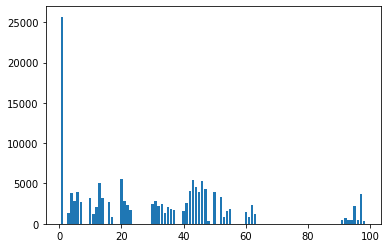

                    count      mean
Accident_Severity                  
1                    1658  0.987937
2                   20676  0.906123
3                  123988  0.800352


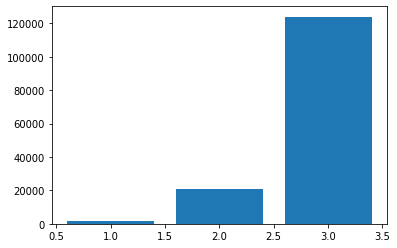

                    count      mean
Number_of_Vehicles                 
1                   43171  0.831160
2                   88592  0.792013
3                   11329  0.920205
4                    2435  0.963450
5                     533  0.990619
6                     157  0.993631
7                      54  1.000000
8                      33  0.969697
9                       8  1.000000
10                      6  1.000000
11                      1  1.000000
13                      1  1.000000
19                      1  1.000000
21                      1  1.000000


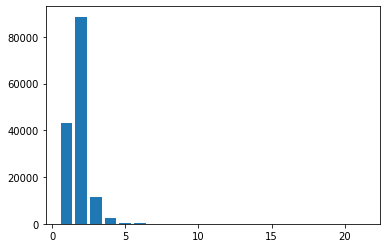

             count      mean
Day_of_Week                 
1            15940  0.852070
2            21093  0.812023
3            22318  0.804104
4            22210  0.801891
5            21780  0.810744
6            23960  0.814649
7            19021  0.839283


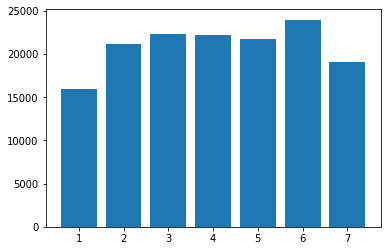

         count      mean
Timebin                 
1        27653  0.806639
2        52283  0.809422
3        35777  0.800514
4        20401  0.844566
5        10208  0.892633


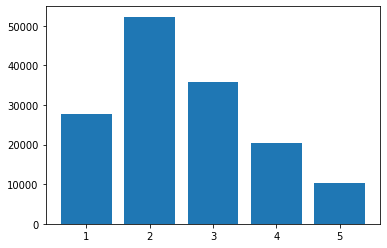

                count      mean
1st_Road_Class                 
1                5246  0.925848
2                 384  0.921875
3               67828  0.837471
4               18573  0.824799
5               12969  0.816485
6               41322  0.766759


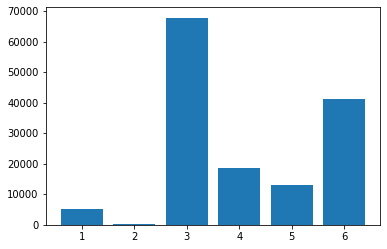

            count      mean
Road_Type                  
1           10329  0.745571
2            2935  0.730835
3           20823  0.872065
6          110187  0.816793
7            1542  0.833982
9             506  0.624506


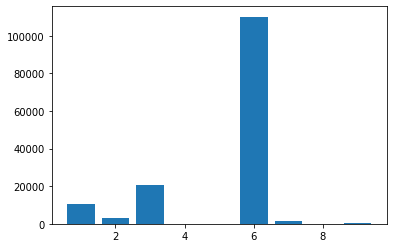

             count      mean
Speed_limit                 
20            3418  0.713283
30           94997  0.777782
40           12017  0.856287
50            5797  0.911851
60           20016  0.916966
70           10077  0.928054


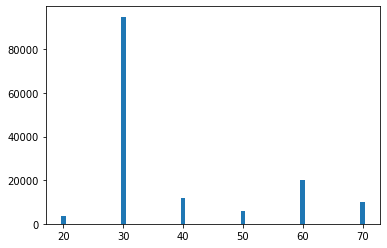

                 count      mean
Junction_Detail                 
0                56410  0.836926
1                13253  0.735607
2                 1956  0.765337
3                48014  0.810743
5                 2078  0.885948
6                14586  0.840943
7                 1017  0.816126
8                 5883  0.800272
9                 3125  0.824960


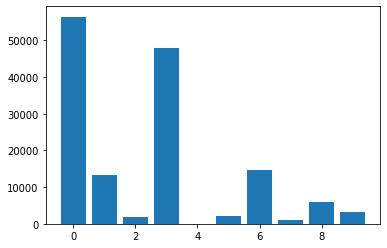

                                    count      mean
Pedestrian_Crossing-Human_Control                  
0                                  145538  0.817573
1                                     341  0.765396
2                                     443  0.808126


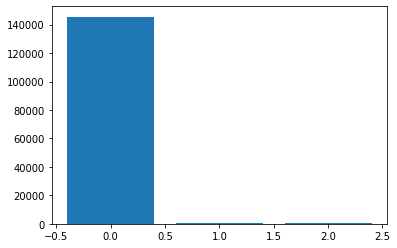

                                          count      mean
Pedestrian_Crossing-Physical_Facilities                  
0                                        118108  0.823018
1                                          4519  0.755477
4                                          8526  0.786301
5                                         11324  0.804751
7                                           499  0.795591
8                                          3346  0.829050


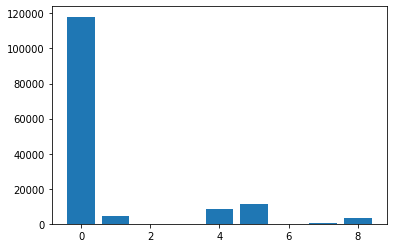

                   count      mean
Light_Conditions                  
1                 108071  0.807090
4                  28449  0.835917
5                    872  0.861239
6                   7199  0.941797
7                   1731  0.619295


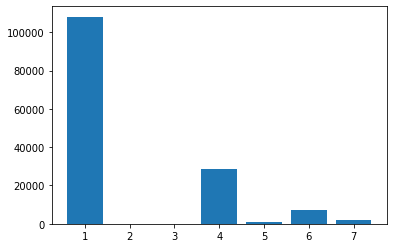

                     count      mean
Weather_Conditions                  
1                   118879  0.817546
2                    17665  0.857345
3                      227  0.845815
4                     1575  0.863492
5                     2333  0.873553
6                       78  0.858974
7                      753  0.885790
8                     2332  0.816895
9                     2480  0.420968


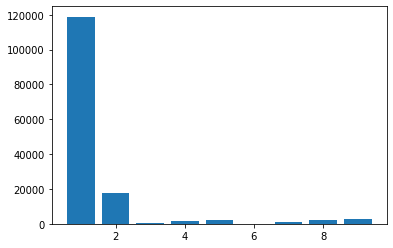

                          count      mean
Road_Surface_Conditions                  
-1                          222  0.198198
 1                       102019  0.798292
 2                        41921  0.862646
 3                          206  0.825243
 4                         1692  0.912530
 5                          262  0.935115


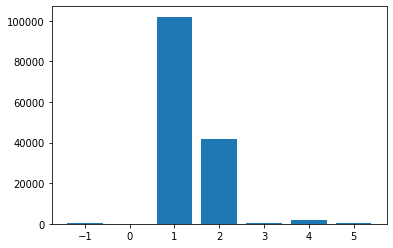

                             count      mean
Special_Conditions_at_Site                  
-1                               1  0.000000
 0                          143116  0.816359
 1                             219  0.853881
 2                              54  0.944444
 3                             207  0.917874
 4                            1562  0.834827
 5                             372  0.889785
 6                             401  0.907731
 7                             390  0.887179


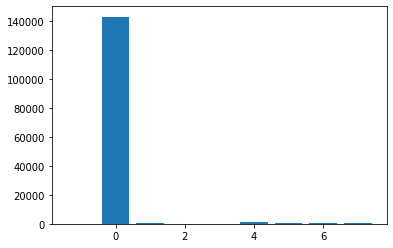

                      count      mean
Carriageway_Hazards                  
-1                        1  0.000000
 0                   143909  0.816718
 1                      149  0.825503
 2                      939  0.862620
 3                      182  0.928571
 6                      450  0.786667
 7                      692  0.893064


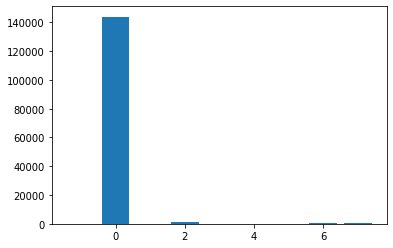

                     count      mean
Urban_or_Rural_Area                 
1                    96287  0.783813
2                    50035  0.882103


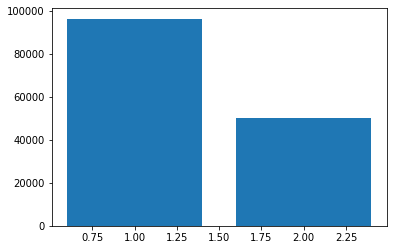

       count      mean
Month                 
1      12086  0.809449
2      10780  0.803154
3      11915  0.809484
4      11008  0.821675
5      12303  0.820450
6      12532  0.813597
7      13026  0.819592
8      12108  0.839693
9      11832  0.817360
10     13450  0.821710
11     13246  0.809905
12     12036  0.821868


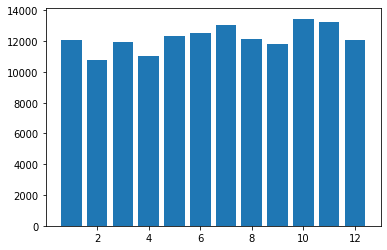

In [19]:
accident_data['Did_Police_Officer_Attend_Scene_of_Accident']=accident_data['Did_Police_Officer_Attend_Scene_of_Accident'].astype(int)

output='Did_Police_Officer_Attend_Scene_of_Accident'

to_chart =['Police_Force','Accident_Severity','Number_of_Vehicles','Day_of_Week','Timebin','1st_Road_Class','Road_Type',
'Speed_limit','Junction_Detail','Pedestrian_Crossing-Human_Control',
'Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Weather_Conditions','Road_Surface_Conditions',
'Special_Conditions_at_Site','Carriageway_Hazards','Urban_or_Rural_Area','Month']

for index,column_name in enumerate(to_chart):
    aggregate=accident_data[output].groupby(accident_data[column_name]).agg(['count', 'mean'])
    print(aggregate)

    barlist=plt.bar(aggregate.index.values, aggregate['count'].values)
    for i in range (0,len(aggregate.index.values)):
        barlist[i]
    plt.show()
    
#Key insights


In [20]:
accident_data.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Timebin,Month
0,1,3,2,1,2014-01-09,5,12,E09000020,3,315,...,0,1,2,2,0,0,1,0,2,1
1,1,3,2,1,2014-01-20,2,12,E09000020,3,3218,...,5,7,1,1,0,0,1,0,5,1
2,1,3,2,1,2014-01-21,3,12,E09000020,3,308,...,0,1,1,1,0,0,1,1,2,1
3,1,3,1,1,2014-01-15,4,12,E09000020,5,0,...,1,4,1,1,0,0,1,0,3,1
4,1,3,2,1,2014-01-09,5,12,E09000020,3,4,...,8,1,1,1,0,0,1,1,1,1


In [21]:
#preparing the data to be able to create dummies and convert to specific data types 
to_convert= ['Police_Force','Accident_Severity','Day_of_Week','Local_Authority_(District)','Local_Authority_(Highway)','Timebin','1st_Road_Class','Road_Type',
'Speed_limit','Junction_Detail','Pedestrian_Crossing-Human_Control',
'Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Weather_Conditions','Road_Surface_Conditions',
'Special_Conditions_at_Site','Carriageway_Hazards','Urban_or_Rural_Area','Month']

output=['Did_Police_Officer_Attend_Scene_of_Accident']
num_cols= ['Number_of_Vehicles','Number_of_Casualties']
           
cols = to_convert + num_cols + output
cat_cols = to_convert + output

accident_data[cat_cols]= accident_data[cat_cols].astype('category')
accident_data_model = accident_data[cols].copy

In [22]:
dummies=pd.get_dummies(accident_data[to_convert], drop_first=True)
accident_model = pd.concat([accident_data[output],accident_data[num_cols],dummies], axis=1)


In [23]:
accident_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146322 entries, 0 to 146321
Columns: 723 entries, Did_Police_Officer_Attend_Scene_of_Accident to Month_12
dtypes: category(1), int64(2), uint8(720)
memory usage: 102.8 MB


In [24]:
accident_model.shape

(146322, 723)

In [25]:
accident_model.isna().sum().sum()

0

In [26]:
accident_model.head()

,Did_Police_Officer_Attend_Scene_of_Accident,Number_of_Vehicles,Number_of_Casualties,Police_Force_3,Police_Force_4,Police_Force_5,Police_Force_6,Police_Force_7,Police_Force_10,Police_Force_11,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#converting the data frame to a h2o frame to use h2o's ML algorithms
hf_accident= h2o.H2OFrame(accident_model)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [28]:
hf_accident.head()

Did_Police_Officer_Attend_Scene_of_Accident,Number_of_Vehicles,Number_of_Casualties,Police_Force_3,Police_Force_4,Police_Force_5,Police_Force_6,Police_Force_7,Police_Force_10,Police_Force_11,Police_Force_12,Police_Force_13,Police_Force_14,Police_Force_16,Police_Force_17,Police_Force_20,Police_Force_21,Police_Force_22,Police_Force_23,Police_Force_30,Police_Force_31,Police_Force_32,Police_Force_33,Police_Force_34,Police_Force_35,Police_Force_36,Police_Force_37,Police_Force_40,Police_Force_41,Police_Force_42,Police_Force_43,Police_Force_44,Police_Force_45,Police_Force_46,Police_Force_47,Police_Force_48,Police_Force_50,Police_Force_52,Police_Force_53,Police_Force_54,Police_Force_55,Police_Force_60,Police_Force_61,Police_Force_62,Police_Force_63,Police_Force_91,Police_Force_92,Police_Force_93,Police_Force_94,Police_Force_95,Police_Force_96,Police_Force_97,Police_Force_98,Accident_Severity_2,Accident_Severity_3,Day_of_Week_2,Day_of_Week_3,Day_of_Week_4,Day_of_Week_5,Day_of_Week_6,Day_of_Week_7,Local_Authority_(District)_2,Local_Authority_(District)_3,Local_Authority_(District)_4,Local_Authority_(District)_5,Local_Authority_(District)_6,Local_Authority_(District)_7,Local_Authority_(District)_8,Local_Authority_(District)_9,Local_Authority_(District)_10,Local_Authority_(District)_11,Local_Authority_(District)_12,Local_Authority_(District)_13,Local_Authority_(District)_14,Local_Authority_(District)_15,Local_Authority_(District)_16,Local_Authority_(District)_17,Local_Authority_(District)_18,Local_Authority_(District)_19,Local_Authority_(District)_20,Local_Authority_(District)_21,Local_Authority_(District)_22,Local_Authority_(District)_23,Local_Authority_(District)_24,Local_Authority_(District)_25,Local_Authority_(District)_26,Local_Authority_(District)_27,Local_Authority_(District)_28,Local_Authority_(District)_29,Local_Authority_(District)_30,Local_Authority_(District)_31,Local_Authority_(District)_32,Local_Authority_(District)_33,Local_Authority_(District)_38,Local_Authority_(District)_40,Local_Authority_(District)_57,Local_Authority_(District)_60,Local_Authority_(District)_61,Local_Authority_(District)_62,Local_Authority_(District)_63,Local_Authority_(District)_64,Local_Authority_(District)_65,Local_Authority_(District)_70,Local_Authority_(District)_71,Local_Authority_(District)_72,Local_Authority_(District)_73,Local_Authority_(District)_74,Local_Authority_(District)_75,Local_Authority_(District)_76,Local_Authority_(District)_77,Local_Authority_(District)_79,Local_Authority_(District)_80,Local_Authority_(District)_82,Local_Authority_(District)_83,Local_Authority_(District)_84,Local_Authority_(District)_85,Local_Authority_(District)_90,Local_Authority_(District)_91,Local_Authority_(District)_92,Local_Authority_(District)_93,Local_Authority_(District)_95,Local_Authority_(District)_100,Local_Authority_(District)_101,Local_Authority_(District)_102,Local_Authority_(District)_104,Local_Authority_(District)_106,Local_Authority_(District)_107,Local_Authority_(District)_109,Local_Authority_(District)_110,Local_Authority_(District)_112,Local_Authority_(District)_114,Local_Authority_(District)_124,Local_Authority_(District)_128,Local_Authority_(District)_129,Local_Authority_(District)_130,Local_Authority_(District)_139,Local_Authority_(District)_146,Local_Authority_(District)_147,Local_Authority_(District)_148,Local_Authority_(District)_149,Local_Authority_(District)_150,Local_Authority_(District)_161,Local_Authority_(District)_169,Local_Authority_(District)_180,Local_Authority_(District)_181,Local_Authority_(District)_182,Local_Authority_(District)_184,Local_Authority_(District)_185,Local_Authority_(District)_186,Local_Authority_(District)_187,Local_Authority_(District)_189,Local_Authority_(District)_200,Local_Authority_(District)_202,Local_Authority_(District)_203,Local_Authority_(District)_204,Local_Authority_(District)_206,Local_Authority_(District)_210,Local_Authority_(District)_211,Local_Authority_(District)_213,Local_Authority_(District)_

In [29]:
hf_accident.types

{'Did_Police_Officer_Attend_Scene_of_Accident': 'int',
 'Number_of_Vehicles': 'int',
 'Number_of_Casualties': 'int',
 'Police_Force_3': 'int',
 'Police_Force_4': 'int',
 'Police_Force_5': 'int',
 'Police_Force_6': 'int',
 'Police_Force_7': 'int',
 'Police_Force_10': 'int',
 'Police_Force_11': 'int',
 'Police_Force_12': 'int',
 'Police_Force_13': 'int',
 'Police_Force_14': 'int',
 'Police_Force_16': 'int',
 'Police_Force_17': 'int',
 'Police_Force_20': 'int',
 'Police_Force_21': 'int',
 'Police_Force_22': 'int',
 'Police_Force_23': 'int',
 'Police_Force_30': 'int',
 'Police_Force_31': 'int',
 'Police_Force_32': 'int',
 'Police_Force_33': 'int',
 'Police_Force_34': 'int',
 'Police_Force_35': 'int',
 'Police_Force_36': 'int',
 'Police_Force_37': 'int',
 'Police_Force_40': 'int',
 'Police_Force_41': 'int',
 'Police_Force_42': 'int',
 'Police_Force_43': 'int',
 'Police_Force_44': 'int',
 'Police_Force_45': 'int',
 'Police_Force_46': 'int',
 'Police_Force_47': 'int',
 'Police_Force_48': 'int

In [30]:
#converting to categorical variables
hf_accident = hf_accident.asfactor()


In [31]:
#number of vehicles and casualities are numeric variables so converting them.
hf_accident[1] = hf_accident[1].asnumeric()
hf_accident[2] = hf_accident[2].asnumeric()

In [32]:
#creating a test, train and validation set.
splits = hf_accident.split_frame(ratios=[0.7,0.15])
train = splits[0]
valid= splits[1]
test = splits[2]

In [33]:
print(train.nrow)
print(valid.nrow)
print(test.nrow)

102404
21893
22025


In [34]:
hf_accident['Did_Police_Officer_Attend_Scene_of_Accident'].levels()

[['0', '1']]

In [35]:
accident_data['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts() #dataset is imbalanced. Need to oversample 2. 

1    119607
0     26715
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

In [36]:
train.types

{'Did_Police_Officer_Attend_Scene_of_Accident': 'enum',
 'Number_of_Vehicles': 'int',
 'Number_of_Casualties': 'int',
 'Police_Force_3': 'enum',
 'Police_Force_4': 'enum',
 'Police_Force_5': 'enum',
 'Police_Force_6': 'enum',
 'Police_Force_7': 'enum',
 'Police_Force_10': 'enum',
 'Police_Force_11': 'enum',
 'Police_Force_12': 'enum',
 'Police_Force_13': 'enum',
 'Police_Force_14': 'enum',
 'Police_Force_16': 'enum',
 'Police_Force_17': 'enum',
 'Police_Force_20': 'enum',
 'Police_Force_21': 'enum',
 'Police_Force_22': 'enum',
 'Police_Force_23': 'enum',
 'Police_Force_30': 'enum',
 'Police_Force_31': 'enum',
 'Police_Force_32': 'enum',
 'Police_Force_33': 'enum',
 'Police_Force_34': 'enum',
 'Police_Force_35': 'enum',
 'Police_Force_36': 'enum',
 'Police_Force_37': 'enum',
 'Police_Force_40': 'enum',
 'Police_Force_41': 'enum',
 'Police_Force_42': 'enum',
 'Police_Force_43': 'enum',
 'Police_Force_44': 'enum',
 'Police_Force_45': 'enum',
 'Police_Force_46': 'enum',
 'Police_Force_47':

# Machine Learning Models

I run 4 different machine learning algorithms to test which has the best predictive power. As the task is a classification task, the models need to be suitable for a classification task. Additionally, the variable we are looking to predict- Did_Police_Officer_Attend_Scene_of_Accident is imbalanced with police attending  119607 times and not attending 26715 in the data set. To manage this I balance the classes for some models. 

The first is random forest. Random forest consists of a large number of individual decision treses operating as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes is closen as the model's prediction. Random forest ensures that the behaviour of each individual tree is not too correlated with the behavior of the other trees in the model through bagging that is, to allow each individual tree to sample from the dataset with replacement randomly and using feature randomness to to obtain a node that produces the most separation in the observations. I use 300 trees with a 5 fold cross validation. I use cross validation to assess the effectiveness of a model and to mitigate overfitting. I also use balance_classes = True to deal with the impact of imbalanced classes. 

The next model used is Generalized Linear Model (GLM) is a flexible generalization of ordinary linear regression that allows for response variables that have error distribution models other than a normal distribution. I use the family=binomial as the outcome variable is binomial. Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model, and, I further run a grid serarch with hyper parameter tuning for alpha and lambda. The lambda parameter controls the amount of regularization applied to the model while the alpha parameter, which controls the distribution between the ℓ1 (LASSO) and ℓ2 (ridge regression) penalties. This model also includes the balance_class = True parameter.

The next model run is Gradient boosting classifier, which are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Boosting models control both bias & variance, and is considered to be more effective. The hyper parameters tuned are learn_rate' which determines the impact of each tree on the final outcome, 'max_depth' which is the maximum depth of a tree used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample. A 5 fold cross validation was also performed but without the balance_class as GBM works well even with imbalanced classes. 

Finally I used H2O auto ml to allow the algorithm to determine which model was most suitable and a binomial GLM stacked ensemble was chosen.

In [49]:
#random forest while balancing classes 

from h2o.estimators.random_forest import H2ORandomForestEstimator
rf = H2ORandomForestEstimator(model_id='rf', ntrees=300, max_depth=30, stopping_rounds=2, score_each_iteration=True, balance_classes=True)
rf.train(y=0,training_frame=train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [50]:
rf.auc()

0.7643819229745208

In [51]:
rf.accuracy()

[[0.8157947762370196, 0.6950376122300412]]

In [52]:
#random forest output
rf_performance= rf.model_performance(test)
print(rf_performance)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.1375296396221932
RMSE: 0.3708498882596477
LogLoss: 0.43115488324426016
Mean Per-Class Error: 0.33443015743629245
AUC: 0.7276972856727457
AUCPR: 0.9157932507308565
Gini: 0.45539457134549144

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6333572066596795: 


,,0,1,Error,Rate
0,0,179.0,3916.0,0.9563,(3916.0/4095.0)
1,1,107.0,17823.0,0.006,(107.0/17930.0)
2,Total,286.0,21739.0,0.1827,(4023.0/22025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.633357,0.898586,346.0
1,max f2,0.498875,0.956424,380.0
2,max f0point5,0.734352,0.859427,276.0
3,max accuracy,0.637951,0.817435,344.0
4,max precision,0.999880,1.000000,0.0
5,max recall,0.398106,1.000000,393.0
6,max specificity,0.999880,1.000000,0.0
7,max absolute_mcc,0.801013,0.262981,208.0
8,max min_per_class_accuracy,0.803442,0.664138,205.0
9,max mean_per_class_accuracy,0.819119,0.665570,187.0



Gains/Lift Table: Avg response rate: 81.41 %, avg score: 83.31 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010034,0.990451,1.228388,1.228388,1.000000,0.995657,1.000000,0.995657,0.012326,0.012326,22.838818,22.838818
1,,2,0.020023,0.984296,1.217221,1.222817,0.990909,0.986817,0.995465,0.991247,0.012158,0.024484,21.722101,22.281725
2,,3,0.030011,0.980809,1.217221,1.220955,0.990909,0.982626,0.993949,0.988378,0.012158,0.036642,21.722101,22.095466
3,,4,0.040000,0.975765,1.211637,1.218628,0.986364,0.978260,0.992054,0.985851,0.012103,0.048745,21.163743,21.862800
4,,5,0.050034,0.971720,1.195038,1.213897,0.972851,0.973490,0.988203,0.983372,0.011991,0.060736,19.503827,21.389721
5,,6,0.100068,0.956034,1.194947,1.204422,0.972777,0.963810,0.980490,0.973591,0.059788,0.120524,19.494748,20.442235
6,,7,0.150011,0.941459,1.185953,1.198273,0.965455,0.948683,0.975484,0.965299,0.059230,0.179755,18.595295,19.827333
7,,8,0.200000,0.927133,1.144711,1.184886,0.931880,0.934270,0.964586,0.957543,0.057223,0.236977,14.471051,18.488567
8,,9,0.300023,0.894956,1.119657,1.163139,0.911484,0.910940,0.946883,0.942006,0.111991,0.348968,11.965659,16.313935
9,,10,0.400045,0.863145,1.066685,1.139023,0.868361,0.878679,0.927250,0.926173,0.106693,0.455661,6.668478,13.902297


In [53]:
rf.varimp

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,9.0,9.0,271213.0,30.0,30.0,30.0,1501.0,2949.0,2398.3333




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.29625781156777464
RMSE: 0.5442957023234472
LogLoss: 0.8192457770793843
Mean Per-Class Error: 0.3049422726901423
AUC: 0.7643819229745208
AUCPR: 0.7615983766587329
Gini: 0.5287638459490416

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7452209909055107: 


,,0,1,Error,Rate
0,0,39333.0,43070.0,0.5227,(43070.0/82403.0)
1,1,14137.0,68300.0,0.1715,(14137.0/82437.0)
2,Total,53470.0,111370.0,0.347,(57207.0/164840.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.745221,0.704825,198.0
1,max f2,0.599290,0.836612,297.0
2,max f0point5,0.847106,0.714689,109.0
3,max accuracy,0.815795,0.695038,134.0
4,max precision,0.993458,0.994120,3.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,0.999993,0.999806,0.0
7,max absolute_mcc,0.859508,0.405332,100.0
8,max min_per_class_accuracy,0.787182,0.687123,158.0
9,max mean_per_class_accuracy,0.815795,0.695058,134.0



Gains/Lift Table: Avg response rate: 50.01 %, avg score: 77.69 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.013791,1.000000,1.985780,1.985780,0.993074,1.000000,0.993074,1.000000,0.027385,0.027385,98.577968,98.577968
1,,2,0.020107,0.989113,1.990180,1.987162,0.995274,0.993011,0.993765,0.997804,0.012571,0.039956,99.017988,98.716192
2,,3,0.030017,0.980938,1.973129,1.982529,0.986747,0.984720,0.991448,0.993485,0.019554,0.059510,97.312881,98.252887
3,,4,0.040005,0.973994,1.931501,1.969789,0.965929,0.977403,0.985077,0.989470,0.019292,0.078802,93.150147,96.978916
4,,5,0.050005,0.968696,1.936358,1.963104,0.968358,0.971332,0.981734,0.985843,0.019363,0.098165,93.635805,96.310373
5,,6,0.100010,0.942189,1.861881,1.912492,0.931113,0.955263,0.956423,0.970553,0.093103,0.191269,86.188083,91.249228
6,,7,0.150003,0.917405,1.700426,1.841815,0.850370,0.929592,0.921078,0.956901,0.085010,0.276278,70.042569,84.181467
7,,8,0.200002,0.893586,1.547893,1.768336,0.774090,0.905452,0.884332,0.944039,0.077393,0.353671,54.789263,76.833635
8,,9,0.300001,0.850038,1.296596,1.611093,0.648418,0.871121,0.805695,0.919734,0.129657,0.483329,29.659586,61.109265
9,,10,0.400023,0.813775,1.084913,1.479526,0.542557,0.831220,0.739900,0.897602,0.108515,0.591844,8.491322,47.952620




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.1352673705602264
RMSE: 0.36778712669182206
LogLoss: 0.42669388488221693
Mean Per-Class Error: 0.33650660477324545
AUC: 0.7247757393826051
AUCPR: 0.915431630692122
Gini: 0.4495514787652102

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6328839118781727: 


,,0,1,Error,Rate
0,0,188.0,3795.0,0.9528,(3795.0/3983.0)
1,1,88.0,17822.0,0.0049,(88.0/17910.0)
2,Total,276.0,21617.0,0.1774,(3883.0/21893.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.632884,0.901763,348.0
1,max f2,0.473339,0.957553,384.0
2,max f0point5,0.723444,0.861522,289.0
3,max accuracy,0.632884,0.822637,348.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.402132,1.000000,391.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.799906,0.255845,209.0
8,max min_per_class_accuracy,0.805167,0.660306,204.0
9,max mean_per_class_accuracy,0.819801,0.663493,188.0



Gains/Lift Table: Avg response rate: 81.81 %, avg score: 83.32 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010003,0.989247,1.216808,1.216808,0.995434,0.995341,0.995434,0.995341,0.012172,0.012172,21.680804,21.680804
1,,2,0.020006,0.983724,1.211226,1.214017,0.990868,0.986099,0.993151,0.990720,0.012116,0.024288,21.122635,21.401719
2,,3,0.030010,0.979656,1.205645,1.211226,0.986301,0.981825,0.990868,0.987755,0.012060,0.036348,20.564466,21.122635
3,,4,0.040058,0.974841,1.177939,1.202876,0.963636,0.977073,0.984036,0.985075,0.011837,0.048185,17.793919,20.287609
4,,5,0.050016,0.971156,1.205568,1.203412,0.986239,0.972907,0.984475,0.982653,0.012004,0.060190,20.556785,20.341199
5,,6,0.100032,0.955656,1.179969,1.191690,0.965297,0.963536,0.974886,0.973094,0.059017,0.119207,17.996890,19.169044
6,,7,0.150002,0.940792,1.159818,1.181073,0.948812,0.948227,0.966200,0.964810,0.057956,0.177164,15.981767,18.107266
7,,8,0.200018,0.925400,1.159875,1.175772,0.948858,0.933007,0.961863,0.956858,0.058012,0.235176,15.987482,17.577199
8,,9,0.300005,0.895291,1.111822,1.154459,0.909548,0.910179,0.944428,0.941300,0.111167,0.346343,11.182181,15.445851
9,,10,0.399991,0.864102,1.089485,1.138217,0.891275,0.879621,0.931141,0.925882,0.108934,0.455276,8.948486,13.821695




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-01-14 13:21:09,0.000 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-01-14 13:21:11,1.729 sec,1.0,0.548372,0.969586,0.712213,0.649041,1.967957,0.435076,0.381734,0.815594,0.673891,0.815646,1.132280,0.181930
2,,2020-01-14 13:21:12,2.556 sec,2.0,0.547213,0.925930,0.722381,0.664630,1.975389,0.402077,0.371854,0.462323,0.696775,0.877647,1.191555,0.181291
3,,2020-01-14 13:21:12,3.446 sec,3.0,0.545060,0.907328,0.734046,0.679572,1.974369,0.384774,0.369674,0.439499,0.709131,0.891102,1.206678,0.180332
4,,2020-01-14 13:21:13,4.064 sec,4.0,0.545706,0.881275,0.737782,0.696773,1.978554,0.381502,0.368531,0.432357,0.716659,0.897809,1.214653,0.178550
5,,2020-01-14 13:21:14,4.917 sec,5.0,0.544936,0.867424,0.745856,0.713949,1.977314,0.375691,0.368226,0.429579,0.720502,0.905084,1.216833,0.179235
6,,2020-01-14 13:21:15,5.551 sec,6.0,0.546103,0.853394,0.747879,0.728252,1.978855,0.378349,0.367947,0.427443,0.722808,0.910767,1.211377,0.178459
7,,2020-01-14 13:21:15,6.430 sec,7.0,0.545314,0.837876,0.754556,0.741149,1.982118,0.361677,0.367772,0.426722,0.724540,0.912680,1.216808,0.178505
8,,2020-01-14 13:21:16,7.311 sec,8.0,0.545041,0.826960,0.759229,0.751543,1.985390,0.356453,0.367939,0.427024,0.724277,0.913367,1.216808,0.178139
9,,2020-01-14 13:21:17,8.167 sec,9.0,0.544296,0.819246,0.764382,0.761598,1.985780,0.347046,0.367787,0.426694,0.724776,0.915432,1.216808,0.177363



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Accident_Severity_3,3258.977539,1.000000,0.066289
1,Speed_limit_30,2673.276367,0.820281,0.054375
2,Number_of_Vehicles,2606.989746,0.799941,0.053027
3,Weather_Conditions_9,2178.555420,0.668478,0.044313
4,Speed_limit_60,1951.000732,0.598654,0.039684
5,Urban_or_Rural_Area_2,1866.740601,0.572799,0.037970
6,Police_Force_4,1315.781006,0.403740,0.026763
7,Local_Authority_(Highway)_E10000017,1132.718994,0.347569,0.023040
8,Road_Surface_Conditions_1,1017.529175,0.312223,0.020697
9,Police_Force_62,979.353577,0.300509,0.019920



See the whole table with table.as_data_frame()


<bound method ModelBase.varimp of >

In [37]:
#running a glm binomial model with hyper parameter tuning with a 5 fold cross validation

from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

#GLM 
hyper_parameters = { 'alpha': [0.01,0.1,0.3,0.5,0.7,0.9],
                     'lambda': [1e-4,1e-5,1e-6,1e-7,1e-8] }
search_criteria = { 'strategy': "RandomDiscrete",
                    'seed': 1,
                    'stopping_metric': "AUTO",
                    'stopping_tolerance': 0.001,
                    'stopping_rounds': 2 }

glm_model = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial', nfolds=5),
      hyper_parameters,
      grid_id="glm_model",
      search_criteria=search_criteria)

glm_model.train(y=0, training_frame=train, validation_frame = valid)
manual_hyper_parameters = {'alpha': [0.05], 'lambda': [1e-4]}
glm_model = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial', nfolds=5, balance_classes=True),
      manual_hyper_parameters,
      grid_id="glm_model")
glm_model.train(y=0, training_frame=train, validation_frame=valid)

glm Grid Build progress: |████████████████████████████████████████████████| 100%
glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [40]:
glm_model_performance= glm_model.model_performance(test)
print(glm_model_performance)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.13475130257893825
RMSE: 0.36708487108424703
LogLoss: 0.4234580038319358
Null degrees of freedom: 22024
Residual degrees of freedom: 21112
Null deviance: 21157.727873504457
Residual deviance: 18653.325068796774
AIC: 20479.325068796774
AUC: 0.7367321635419795
AUCPR: 0.9141095566620681
Gini: 0.4734643270839589

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48255845249069057: 


,,0,1,Error,Rate
0,0,229.0,3866.0,0.9441,(3866.0/4095.0)
1,1,141.0,17789.0,0.0079,(141.0/17930.0)
2,Total,370.0,21655.0,0.1819,(4007.0/22025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.482558,0.898775,337.0
1,max f2,0.176089,0.956351,392.0
2,max f0point5,0.689653,0.861398,245.0
3,max accuracy,0.482558,0.818070,337.0
4,max precision,0.992911,0.998534,5.0
5,max recall,0.097819,1.000000,399.0
6,max specificity,0.999144,0.999756,0.0
7,max absolute_mcc,0.787451,0.276112,176.0
8,max min_per_class_accuracy,0.806764,0.669325,162.0
9,max mean_per_class_accuracy,0.833694,0.670955,140.0



Gains/Lift Table: Avg response rate: 81.41 %, avg score: 81.90 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010034,0.997937,1.222830,1.222830,0.995475,0.998920,0.995475,0.998920,0.012270,0.012270,22.282986,22.282986
1,,2,0.020023,0.995753,1.228388,1.225603,1.000000,0.996897,0.997732,0.997911,0.012270,0.024540,22.838818,22.560272
2,,3,0.030011,0.992620,1.228388,1.226530,1.000000,0.994205,0.998487,0.996678,0.012270,0.036810,22.838818,22.652980
3,,4,0.040000,0.988270,1.211637,1.222811,0.986364,0.990539,0.995460,0.995145,0.012103,0.048912,21.163743,22.281093
4,,5,0.050034,0.983857,1.206155,1.219471,0.981900,0.986022,0.992740,0.993315,0.012103,0.061015,20.615491,21.947066
5,,6,0.100023,0.963472,1.201611,1.210545,0.978202,0.973141,0.985474,0.983233,0.060067,0.121082,20.161132,21.054504
6,,7,0.150011,0.946633,1.188223,1.203107,0.967302,0.954814,0.979419,0.973763,0.059398,0.180480,18.822290,20.310658
7,,8,0.200000,0.930630,1.159215,1.192136,0.943688,0.938592,0.970488,0.964972,0.057948,0.238427,15.921464,19.213608
8,,9,0.300023,0.900737,1.119099,1.167787,0.911030,0.915771,0.950666,0.948569,0.111935,0.350363,11.909899,16.778670
9,,10,0.400000,0.871415,1.081673,1.146263,0.880563,0.885940,0.933144,0.932915,0.108143,0.458505,8.167333,14.626325




ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.134804316604148
RMSE: 0.3671570734769357
LogLoss: 0.4236355599716416
Null degrees of freedom: 22024
Residual degrees of freedom: 21126
Null deviance: 21157.727873504457
Residual deviance: 18661.146416750813
AIC: 20459.146416750813
AUC: 0.7363196585282475
AUCPR: 0.9036096618169535
Gini: 0.4726393170564951

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4632722874008787: 


,,0,1,Error,Rate
0,0,221.0,3874.0,0.946,(3874.0/4095.0)
1,1,131.0,17799.0,0.0073,(131.0/17930.0)
2,Total,352.0,21673.0,0.1818,(4005.0/22025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.463272,0.898871,337.0
1,max f2,0.031865,0.956318,399.0
2,max f0point5,0.688741,0.861621,240.0
3,max accuracy,0.473390,0.818252,334.0
4,max precision,0.999646,1.000000,0.0
5,max recall,0.031865,1.000000,399.0
6,max specificity,0.999646,1.000000,0.0
7,max absolute_mcc,0.782911,0.274444,176.0
8,max min_per_class_accuracy,0.807325,0.669841,157.0
9,max mean_per_class_accuracy,0.835106,0.671294,135.0



Gains/Lift Table: Avg response rate: 81.41 %, avg score: 81.91 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010034,0.999586,1.222830,1.222830,0.995475,0.999788,0.995475,0.999788,0.012270,0.012270,22.282986,22.282986
1,,2,0.020023,0.998986,1.228388,1.225603,1.000000,0.999316,0.997732,0.999553,0.012270,0.024540,22.838818,22.560272
2,,3,0.030011,0.996991,1.228388,1.226530,1.000000,0.998193,0.998487,0.999100,0.012270,0.036810,22.838818,22.652980
3,,4,0.040000,0.991690,1.222805,1.225600,0.995455,0.994499,0.997730,0.997951,0.012214,0.049024,22.280459,22.559955
4,,5,0.050034,0.987085,1.195038,1.219471,0.972851,0.989487,0.992740,0.996254,0.011991,0.061015,19.503827,21.947066
5,,6,0.100023,0.966361,1.202727,1.211103,0.979110,0.976029,0.985928,0.986146,0.060123,0.121138,20.272702,21.110264
6,,7,0.150011,0.948807,1.185991,1.202735,0.965486,0.957294,0.979116,0.976532,0.059286,0.180424,18.599149,20.273479
7,,8,0.200000,0.933011,1.161446,1.192415,0.945504,0.940804,0.970715,0.967602,0.058059,0.238483,16.144604,19.241495
8,,9,0.300023,0.902556,1.113523,1.166114,0.906491,0.917974,0.949304,0.951057,0.111378,0.349861,11.352301,16.611365
9,,10,0.400000,0.872670,1.081115,1.144869,0.880109,0.887870,0.932009,0.935263,0.108087,0.457948,8.111548,14.486893




ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.13486578827898169
RMSE: 0.3672407769828695
LogLoss: 0.4238847062997152
Null degrees of freedom: 22024
Residual degrees of freedom: 21001
Null deviance: 21157.727873504457
Residual deviance: 18672.121312502455
AIC: 20720.121312502455
AUC: 0.7360398905797679
AUCPR: 0.8946357782557344
Gini: 0.47207978115953586

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4690408629637072: 


,,0,1,Error,Rate
0,0,233.0,3862.0,0.9431,(3862.0/4095.0)
1,1,139.0,17791.0,0.0078,(139.0/17930.0)
2,Total,372.0,21653.0,0.1817,(4001.0/22025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.469041,0.898921,336.0
1,max f2,0.020194,0.956318,399.0
2,max f0point5,0.690181,0.861480,242.0
3,max accuracy,0.469041,0.818343,336.0
4,max precision,0.993258,0.998867,6.0
5,max recall,0.020194,1.000000,399.0
6,max specificity,0.999688,0.999756,0.0
7,max absolute_mcc,0.784469,0.274085,178.0
8,max min_per_class_accuracy,0.808073,0.669102,160.0
9,max mean_per_class_accuracy,0.816600,0.671711,153.0



Gains/Lift Table: Avg response rate: 81.41 %, avg score: 81.91 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010034,0.999768,1.222830,1.222830,0.995475,0.999875,0.995475,0.999875,0.012270,0.012270,22.282986,22.282986
1,,2,0.020023,0.999453,1.228388,1.225603,1.000000,0.999622,0.997732,0.999749,0.012270,0.024540,22.838818,22.560272
2,,3,0.030011,0.997785,1.228388,1.226530,1.000000,0.999010,0.998487,0.999503,0.012270,0.036810,22.838818,22.652980
3,,4,0.040000,0.992453,1.228388,1.226994,1.000000,0.995095,0.998865,0.998402,0.012270,0.049080,22.838818,22.699387
4,,5,0.050034,0.987699,1.195038,1.220585,0.972851,0.990104,0.993648,0.996738,0.011991,0.061071,19.503827,22.058535
5,,6,0.100023,0.967110,1.201611,1.211103,0.978202,0.976783,0.985928,0.986765,0.060067,0.121138,20.161132,21.110264
6,,7,0.150011,0.949497,1.183760,1.201991,0.963669,0.957969,0.978511,0.977169,0.059175,0.180312,18.376009,20.199121
7,,8,0.200000,0.933568,1.163677,1.192415,0.947321,0.941558,0.970715,0.968269,0.058171,0.238483,16.367745,19.241495
8,,9,0.300023,0.902812,1.116311,1.167043,0.908761,0.918633,0.950061,0.951721,0.111656,0.350139,11.631100,16.704313
9,,10,0.400000,0.873261,1.076653,1.144451,0.876476,0.888468,0.931669,0.935911,0.107641,0.457780,7.665267,14.445064




ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.1348658090812314
RMSE: 0.3672408053052267
LogLoss: 0.42388489391103507
Null degrees of freedom: 22024
Residual degrees of freedom: 21024
Null deviance: 21157.727873504457
Residual deviance: 18672.129576781095
AIC: 20674.129576781095
AUC: 0.736044412302081
AUCPR: 0.8970392591410021
Gini: 0.4720888246041619

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3785044246883801: 


,,0,1,Error,Rate
0,0,147.0,3948.0,0.9641,(3948.0/4095.0)
1,1,70.0,17860.0,0.0039,(70.0/17930.0)
2,Total,217.0,21808.0,0.1824,(4018.0/22025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.378504,0.898888,356.0
1,max f2,0.020169,0.956318,399.0
2,max f0point5,0.690518,0.861488,243.0
3,max accuracy,0.468402,0.818252,339.0
4,max precision,0.993087,0.998862,6.0
5,max recall,0.020169,1.000000,399.0
6,max specificity,0.999721,0.999756,0.0
7,max absolute_mcc,0.782718,0.274154,179.0
8,max min_per_class_accuracy,0.808477,0.667931,160.0
9,max mean_per_class_accuracy,0.816620,0.671711,153.0



Gains/Lift Table: Avg response rate: 81.41 %, avg score: 81.92 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010034,0.999768,1.222830,1.222830,0.995475,0.999875,0.995475,0.999875,0.012270,0.012270,22.282986,22.282986
1,,2,0.020023,0.999458,1.228388,1.225603,1.000000,0.999622,0.997732,0.999749,0.012270,0.024540,22.838818,22.560272
2,,3,0.030011,0.997790,1.228388,1.226530,1.000000,0.999013,0.998487,0.999504,0.012270,0.036810,22.838818,22.652980
3,,4,0.040000,0.992454,1.228388,1.226994,1.000000,0.995097,0.998865,0.998403,0.012270,0.049080,22.838818,22.699387
4,,5,0.050034,0.987697,1.195038,1.220585,0.972851,0.990106,0.993648,0.996739,0.011991,0.061071,19.503827,22.058535
5,,6,0.100023,0.967115,1.201611,1.211103,0.978202,0.976787,0.985928,0.986768,0.060067,0.121138,20.161132,21.110264
6,,7,0.150011,0.949505,1.183760,1.201991,0.963669,0.957978,0.978511,0.977174,0.059175,0.180312,18.376009,20.199121
7,,8,0.200000,0.933586,1.163677,1.192415,0.947321,0.941570,0.970715,0.968275,0.058171,0.238483,16.367745,19.241495
8,,9,0.300023,0.902829,1.116311,1.167043,0.908761,0.918650,0.950061,0.951731,0.111656,0.350139,11.631100,16.704313
9,,10,0.400000,0.873276,1.076653,1.144451,0.876476,0.888491,0.931669,0.935924,0.107641,0.457780,7.665267,14.445064




ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.1348674218896846
RMSE: 0.36724300114458897
LogLoss: 0.42389062776405434
Null degrees of freedom: 22024
Residual degrees of freedom: 21006
Null deviance: 21157.727873504457
Residual deviance: 18672.382153006594
AIC: 20710.382153006594
AUC: 0.7360144763212247
AUCPR: 0.8987535376052028
Gini: 0.4720289526424495

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4694309059711932: 


,,0,1,Error,Rate
0,0,233.0,3862.0,0.9431,(3862.0/4095.0)
1,1,140.0,17790.0,0.0078,(140.0/17930.0)
2,Total,373.0,21652.0,0.1817,(4002.0/22025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.469431,0.898893,336.0
1,max f2,0.020177,0.956318,399.0
2,max f0point5,0.689837,0.861488,243.0
3,max accuracy,0.469431,0.818297,336.0
4,max precision,0.999743,1.000000,0.0
5,max recall,0.020177,1.000000,399.0
6,max specificity,0.999743,1.000000,0.0
7,max absolute_mcc,0.784190,0.274085,177.0
8,max min_per_class_accuracy,0.808172,0.668864,158.0
9,max mean_per_class_accuracy,0.816284,0.671850,151.0



Gains/Lift Table: Avg response rate: 81.41 %, avg score: 81.93 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010034,0.999768,1.222830,1.222830,0.995475,0.999875,0.995475,0.999875,0.012270,0.012270,22.282986,22.282986
1,,2,0.020023,0.999454,1.228388,1.225603,1.000000,0.999621,0.997732,0.999748,0.012270,0.024540,22.838818,22.560272
2,,3,0.030011,0.997792,1.228388,1.226530,1.000000,0.999016,0.998487,0.999505,0.012270,0.036810,22.838818,22.652980
3,,4,0.040000,0.992460,1.228388,1.226994,1.000000,0.995098,0.998865,0.998404,0.012270,0.049080,22.838818,22.699387
4,,5,0.050034,0.987694,1.195038,1.220585,0.972851,0.990112,0.993648,0.996741,0.011991,0.061071,19.503827,22.058535
5,,6,0.100023,0.967134,1.201611,1.211103,0.978202,0.976798,0.985928,0.986774,0.060067,0.121138,20.161132,21.110264
6,,7,0.150011,0.949521,1.183760,1.201991,0.963669,0.958001,0.978511,0.977186,0.059175,0.180312,18.376009,20.199121
7,,8,0.200000,0.933620,1.163677,1.192415,0.947321,0.941602,0.970715,0.968292,0.058171,0.238483,16.367745,19.241495
8,,9,0.300023,0.902892,1.116311,1.167043,0.908761,0.918693,0.950061,0.951757,0.111656,0.350139,11.631100,16.704313
9,,10,0.400000,0.873353,1.076653,1.144451,0.876476,0.888552,0.931669,0.935959,0.107641,0.457780,7.665267,14.445064




ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.13486618693919816
RMSE: 0.36724131976017915
LogLoss: 0.42388694697469836
Null degrees of freedom: 22024
Residual degrees of freedom: 20991
Null deviance: 21157.727873504457
Residual deviance: 18672.220014235463
AIC: 20740.220014235463
AUC: 0.736024003263267
AUCPR: 0.9019300908075648
Gini: 0.472048006526534

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4690719786540699: 


,,0,1,Error,Rate
0,0,233.0,3862.0,0.9431,(3862.0/4095.0)
1,1,139.0,17791.0,0.0078,(139.0/17930.0)
2,Total,372.0,21653.0,0.1817,(4001.0/22025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.469072,0.898921,337.0
1,max f2,0.020068,0.956318,399.0
2,max f0point5,0.690037,0.861480,239.0
3,max accuracy,0.469072,0.818343,337.0
4,max precision,0.999785,1.000000,0.0
5,max recall,0.020068,1.000000,399.0
6,max specificity,0.999785,1.000000,0.0
7,max absolute_mcc,0.776516,0.274110,182.0
8,max min_per_class_accuracy,0.808102,0.668991,158.0
9,max mean_per_class_accuracy,0.816697,0.671599,152.0



Gains/Lift Table: Avg response rate: 81.41 %, avg score: 81.92 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010034,0.999771,1.222830,1.222830,0.995475,0.999876,0.995475,0.999876,0.012270,0.012270,22.282986,22.282986
1,,2,0.020023,0.999460,1.228388,1.225603,1.000000,0.999627,0.997732,0.999752,0.012270,0.024540,22.838818,22.560272
2,,3,0.030011,0.997793,1.228388,1.226530,1.000000,0.999016,0.998487,0.999507,0.012270,0.036810,22.838818,22.652980
3,,4,0.040000,0.992454,1.228388,1.226994,1.000000,0.995101,0.998865,0.998407,0.012270,0.049080,22.838818,22.699387
4,,5,0.050034,0.987714,1.195038,1.220585,0.972851,0.990111,0.993648,0.996743,0.011991,0.061071,19.503827,22.058535
5,,6,0.100023,0.967116,1.201611,1.211103,0.978202,0.976794,0.985928,0.986773,0.060067,0.121138,20.161132,21.110264
6,,7,0.150011,0.949506,1.183760,1.201991,0.963669,0.957982,0.978511,0.977179,0.059175,0.180312,18.376009,20.199121
7,,8,0.200000,0.933574,1.163677,1.192415,0.947321,0.941576,0.970715,0.968280,0.058171,0.238483,16.367745,19.241495
8,,9,0.300023,0.902827,1.116311,1.167043,0.908761,0.918652,0.950061,0.951735,0.111656,0.350139,11.631100,16.704313
9,,10,0.400000,0.873285,1.076653,1.144451,0.876476,0.888490,0.931669,0.935927,0.107641,0.457780,7.665267,14.445064



{'glm_model_model_6': , 'glm_model_model_4': , 'glm_model_model_2': , 'glm_model_model_1': , 'glm_model_model_5': , 'glm_model_model_3': }


In [41]:
glm_model.auc() #auc is at 0.74

{'glm_model_model_6': 0.7417359302411317,
 'glm_model_model_4': 0.7426882837390563,
 'glm_model_model_2': 0.7427835644716069,
 'glm_model_model_1': 0.7427773444395164,
 'glm_model_model_5': 0.7427796228653591,
 'glm_model_model_3': 0.7427800898241557}

In [42]:
glm_model.accuracy() #accuracy is at 0.82

{'glm_model_model_6': [[0.530540507577957, 0.8229658997695403]],
 'glm_model_model_4': [[0.49170008477779326, 0.823288152806531]],
 'glm_model_model_2': [[0.48793046343260893, 0.823288152806531]],
 'glm_model_model_1': [[0.487825967992794, 0.823288152806531]],
 'glm_model_model_5': [[0.4878009190941501, 0.8232686223194406]],
 'glm_model_model_3': [[0.48815820023928086, 0.8233076832936214]]}

In [69]:
glm_model.coef()

{'glm_model_model_6': {'Intercept': 5.315885658019261,
  'Police_Force_3.0': 0.18167673495053574,
  'Police_Force_3.1': -0.17885474001254284,
  'Police_Force_4.0': -1.2748346956449301,
  'Police_Force_4.1': 1.2879433853793874,
  'Police_Force_5.0': 0.009732694546854858,
  'Police_Force_5.1': -0.00974131017640713,
  'Police_Force_6.0': -0.13467491240291224,
  'Police_Force_6.1': 0.13500714985092274,
  'Police_Force_7.0': 0.18690943502154378,
  'Police_Force_7.1': -0.18551814937744862,
  'Police_Force_10.0': 0.2422296330431186,
  'Police_Force_10.1': -0.23966790210416253,
  'Police_Force_11.0': 0.3211544642487057,
  'Police_Force_11.1': -0.3140452238649713,
  'Police_Force_12.0': 0.1486453846098448,
  'Police_Force_12.1': -0.14804075968171512,
  'Police_Force_13.0': 0.0,
  'Police_Force_13.1': 0.0,
  'Police_Force_14.0': -0.02389897444127924,
  'Police_Force_14.1': 0.023910812784304063,
  'Police_Force_16.0': 0.0,
  'Police_Force_16.1': -0.3709531214896245,
  'Police_Force_17.0': 0.22583

In [43]:
#running a gbm model over random  forest as GBM prevents overfitting additionally, the model also manages imbalanced classes well. 

from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# GBM hyperparameters
gbm_params = {'learn_rate': [i * 0.01 for i in range(1,5)],
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 10)],
                'col_sample_rate': [i * 0.1 for i in range(1, 5)]}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 10, 'seed': 2}

# Train and validate a random grid of GBMs
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid',
                          hyper_params=gbm_params,
                          search_criteria=search_criteria)
gbm_grid.train( y=0, nfolds=5,
                training_frame=train,
                validation_frame=valid,
                ntrees=200,
                seed=1, stopping_metric = 'AUC', stopping_rounds= 3)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [44]:
gbm_grid_performance= gbm_grid.model_performance(test)

In [46]:
gbm_grid.auc()

{'gbm_grid_model_8': 0.7711476477537684,
 'gbm_grid_model_3': 0.7836997567443805,
 'gbm_grid_model_9': 0.7633852824652881,
 'gbm_grid_model_5': 0.77412566594898,
 'gbm_grid_model_6': 0.7520069339807036,
 'gbm_grid_model_10': 0.7373475373043694,
 'gbm_grid_model_4': 0.7512132084357209,
 'gbm_grid_model_2': 0.7262036171885135,
 'gbm_grid_model_1': 0.7119765452502331,
 'gbm_grid_model_7': 0.699602093263933}

In [47]:
gbm_grid.accuracy()

{'gbm_grid_model_8': [[0.6109875403089426, 0.8277703995937659]],
 'gbm_grid_model_3': [[0.5990668798022101, 0.8312468262958478]],
 'gbm_grid_model_9': [[0.6040998546583407, 0.826491152689348]],
 'gbm_grid_model_5': [[0.6118939565839492, 0.8287371587047381]],
 'gbm_grid_model_6': [[0.6015722109999944, 0.825143549080114]],
 'gbm_grid_model_10': [[0.6814990507405404, 0.8237568844966994]],
 'gbm_grid_model_4': [[0.6851343585999189, 0.8260321862427249]],
 'gbm_grid_model_2': [[0.6900060534294978, 0.8228194211163626]],
 'gbm_grid_model_1': [[0.5949523959283431, 0.8227217686809108]],
 'gbm_grid_model_7': [[0.7083859705020306, 0.8216085309167611]]}

In [45]:
print(gbm_grid_performance)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13369661487547696
RMSE: 0.36564547703407596
LogLoss: 0.4198436682757331
Mean Per-Class Error: 0.3195508989987518
AUC: 0.7452860976787357
AUCPR: 0.9260613301696192
Gini: 0.4905721953574713

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46830550859215003: 


,,0,1,Error,Rate
0,0,199.0,3896.0,0.9514,(3896.0/4095.0)
1,1,83.0,17847.0,0.0046,(83.0/17930.0)
2,Total,282.0,21743.0,0.1807,(3979.0/22025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.468306,0.899705,347.0
1,max f2,0.211591,0.956443,390.0
2,max f0point5,0.720822,0.862722,234.0
3,max accuracy,0.489354,0.819478,342.0
4,max precision,0.991702,1.000000,0.0
5,max recall,0.176973,1.000000,394.0
6,max specificity,0.991702,1.000000,0.0
7,max absolute_mcc,0.778192,0.288394,187.0
8,max min_per_class_accuracy,0.796432,0.676687,172.0
9,max mean_per_class_accuracy,0.810105,0.680449,160.0



Gains/Lift Table: Avg response rate: 81.41 %, avg score: 81.87 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010034,0.985743,1.228388,1.228388,1.000000,0.987818,1.000000,0.987818,0.012326,0.012326,22.838818,22.838818
1,,2,0.020023,0.983172,1.228388,1.228388,1.000000,0.984541,1.000000,0.986183,0.012270,0.024596,22.838818,22.838818
2,,3,0.030011,0.978373,1.217221,1.224671,0.990909,0.980829,0.996974,0.984401,0.012158,0.036754,21.722101,22.467142
3,,4,0.040000,0.973822,1.222805,1.224205,0.995455,0.976107,0.996595,0.982330,0.012214,0.048968,22.280459,22.420524
4,,5,0.050034,0.969928,1.206155,1.220585,0.981900,0.971813,0.993648,0.980221,0.012103,0.061071,20.615491,22.058535
5,,6,0.100023,0.954443,1.203843,1.212218,0.980018,0.961940,0.986836,0.971085,0.060178,0.121249,20.384273,21.221784
6,,7,0.150011,0.940874,1.196033,1.206824,0.973660,0.947537,0.982446,0.963238,0.059788,0.181037,19.603281,20.682446
7,,8,0.200000,0.927213,1.170372,1.197713,0.952770,0.934016,0.975028,0.955934,0.058505,0.239543,17.037166,19.771333
8,,9,0.300023,0.894810,1.134712,1.176710,0.923740,0.911627,0.957930,0.941163,0.113497,0.353040,13.471173,17.670962
9,,10,0.400000,0.865700,1.071074,1.150307,0.871935,0.880388,0.936436,0.925973,0.107083,0.460123,7.107416,15.030675




ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13373073180998063
RMSE: 0.36569212708230486
LogLoss: 0.41988055136945873
Mean Per-Class Error: 0.32071207592679984
AUC: 0.744443491069258
AUCPR: 0.9253343613122296
Gini: 0.488886982138516

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45846840039133085: 


,,0,1,Error,Rate
0,0,194.0,3901.0,0.9526,(3901.0/4095.0)
1,1,77.0,17853.0,0.0043,(77.0/17930.0)
2,Total,271.0,21754.0,0.1806,(3978.0/22025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.458468,0.899758,348.0
1,max f2,0.211159,0.956454,389.0
2,max f0point5,0.718240,0.862382,235.0
3,max accuracy,0.494578,0.819387,341.0
4,max precision,0.988947,1.000000,0.0
5,max recall,0.130590,1.000000,397.0
6,max specificity,0.988947,1.000000,0.0
7,max absolute_mcc,0.795268,0.282806,171.0
8,max min_per_class_accuracy,0.794043,0.675906,172.0
9,max mean_per_class_accuracy,0.814481,0.679288,155.0



Gains/Lift Table: Avg response rate: 81.41 %, avg score: 81.88 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010034,0.983454,1.228388,1.228388,1.000000,0.986036,1.000000,0.986036,0.012326,0.012326,22.838818,22.838818
1,,2,0.020023,0.980456,1.222805,1.225603,0.995455,0.981868,0.997732,0.983957,0.012214,0.024540,22.280459,22.560272
2,,3,0.030011,0.977513,1.217221,1.222813,0.990909,0.978899,0.995461,0.982274,0.012158,0.036698,21.722101,22.281304
3,,4,0.040000,0.974078,1.228388,1.224205,1.000000,0.975760,0.996595,0.980647,0.012270,0.048968,22.838818,22.420524
4,,5,0.050034,0.970922,1.206155,1.220585,0.981900,0.972370,0.993648,0.978987,0.012103,0.061071,20.615491,22.058535
5,,6,0.100023,0.955765,1.206074,1.213333,0.981835,0.962789,0.987744,0.970892,0.060290,0.121361,20.607413,21.333303
6,,7,0.150011,0.944172,1.183760,1.203478,0.963669,0.949956,0.979722,0.963915,0.059175,0.180535,18.376009,20.347837
7,,8,0.200000,0.931784,1.173719,1.196040,0.955495,0.938307,0.973666,0.957515,0.058673,0.239208,17.371877,19.604016
8,,9,0.300023,0.896488,1.141403,1.177825,0.929187,0.915695,0.958838,0.943573,0.114166,0.353374,14.140290,17.782498
9,,10,0.400000,0.865608,1.073306,1.151701,0.873751,0.879901,0.937571,0.927659,0.107306,0.460680,7.330556,15.170106




ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1341076196023171
RMSE: 0.3662070720266296
LogLoss: 0.4209714667864784
Mean Per-Class Error: 0.32211837242512087
AUC: 0.7430394213829796
AUCPR: 0.926075467131425
Gini: 0.48607884276595925

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43063177680259307: 


,,0,1,Error,Rate
0,0,163.0,3932.0,0.9602,(3932.0/4095.0)
1,1,52.0,17878.0,0.0029,(52.0/17930.0)
2,Total,215.0,21810.0,0.1809,(3984.0/22025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.430632,0.899748,355.0
1,max f2,0.198482,0.956481,393.0
2,max f0point5,0.734071,0.861992,229.0
3,max accuracy,0.456574,0.819251,350.0
4,max precision,0.992052,1.000000,0.0
5,max recall,0.198482,1.000000,393.0
6,max specificity,0.992052,1.000000,0.0
7,max absolute_mcc,0.769271,0.278957,199.0
8,max min_per_class_accuracy,0.795273,0.673452,176.0
9,max mean_per_class_accuracy,0.816851,0.677882,157.0



Gains/Lift Table: Avg response rate: 81.41 %, avg score: 81.86 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010034,0.983314,1.228388,1.228388,1.000000,0.986293,1.000000,0.986293,0.012326,0.012326,22.838818,22.838818
1,,2,0.020023,0.980495,1.222805,1.225603,0.995455,0.981819,0.997732,0.984061,0.012214,0.024540,22.280459,22.560272
2,,3,0.030011,0.976274,1.222805,1.224671,0.995455,0.978451,0.996974,0.982194,0.012214,0.036754,22.280459,22.467142
3,,4,0.040000,0.972962,1.222805,1.224205,0.995455,0.974577,0.996595,0.980292,0.012214,0.048968,22.280459,22.420524
4,,5,0.050034,0.969490,1.217272,1.222815,0.990950,0.971181,0.995463,0.978465,0.012214,0.061182,21.727154,22.281473
5,,6,0.100023,0.953047,1.202727,1.212775,0.979110,0.961017,0.987290,0.969745,0.060123,0.121305,20.272702,21.277544
6,,7,0.150011,0.938816,1.184876,1.203478,0.964578,0.945943,0.979722,0.961813,0.059230,0.180535,18.487579,20.347837
7,,8,0.200000,0.926570,1.181529,1.197992,0.961853,0.932654,0.975255,0.954525,0.059063,0.239598,18.152868,19.799219
8,,9,0.300023,0.893644,1.138615,1.178197,0.926918,0.910796,0.959140,0.939946,0.113887,0.353486,13.861491,17.819677
9,,10,0.400000,0.864835,1.072190,1.151701,0.872843,0.878662,0.937571,0.924629,0.107195,0.460680,7.218986,15.170106




ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1339373407840804
RMSE: 0.3659745083801335
LogLoss: 0.4206775343961746
Mean Per-Class Error: 0.3204264379111005
AUC: 0.7442097098538816
AUCPR: 0.9253937447711408
Gini: 0.48841941970776315

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4376837491652703: 


,,0,1,Error,Rate
0,0,163.0,3932.0,0.9602,(3932.0/4095.0)
1,1,56.0,17874.0,0.0031,(56.0/17930.0)
2,Total,219.0,21806.0,0.1811,(3988.0/22025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.437684,0.899638,354.0
1,max f2,0.239712,0.956533,387.0
2,max f0point5,0.724496,0.861828,235.0
3,max accuracy,0.495463,0.819115,342.0
4,max precision,0.988705,1.000000,0.0
5,max recall,0.156005,1.000000,396.0
6,max specificity,0.988705,1.000000,0.0
7,max absolute_mcc,0.792062,0.284485,175.0
8,max min_per_class_accuracy,0.793694,0.676799,173.0
9,max mean_per_class_accuracy,0.812421,0.679574,156.0



Gains/Lift Table: Avg response rate: 81.41 %, avg score: 81.87 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010034,0.984100,1.228388,1.228388,1.000000,0.985861,1.000000,0.985861,0.012326,0.012326,22.838818,22.838818
1,,2,0.020023,0.981335,1.228388,1.228388,1.000000,0.982751,1.000000,0.984310,0.012270,0.024596,22.838818,22.838818
2,,3,0.030011,0.975962,1.217221,1.224671,0.990909,0.978775,0.996974,0.982468,0.012158,0.036754,21.722101,22.467142
3,,4,0.040000,0.971042,1.211637,1.221417,0.986364,0.973563,0.994325,0.980244,0.012103,0.048857,21.163743,22.141662
4,,5,0.050034,0.966937,1.222830,1.221700,0.995475,0.968961,0.994555,0.977981,0.012270,0.061127,22.282986,22.170004
5,,6,0.100023,0.952555,1.207190,1.214448,0.982743,0.959757,0.988652,0.968873,0.060346,0.121472,20.718983,21.444823
6,,7,0.150011,0.939187,1.187107,1.205337,0.966394,0.945732,0.981235,0.961162,0.059342,0.180814,18.710719,20.533731
7,,8,0.200000,0.924676,1.177066,1.198271,0.958220,0.932188,0.975482,0.953920,0.058840,0.239654,17.706587,19.827105
8,,9,0.300023,0.893040,1.131366,1.175966,0.921017,0.909422,0.957324,0.939085,0.113162,0.352817,13.136614,17.596604
9,,10,0.400000,0.863418,1.073306,1.150307,0.873751,0.878031,0.936436,0.923825,0.107306,0.460123,7.330556,15.030675




ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1349820673375417
RMSE: 0.36739905734438366
LogLoss: 0.4239883511250779
Mean Per-Class Error: 0.3289637765097888
AUC: 0.7378923121867907
AUCPR: 0.9241816130509403
Gini: 0.4757846243735815

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5193011647538416: 


,,0,1,Error,Rate
0,0,196.0,3899.0,0.9521,(3899.0/4095.0)
1,1,84.0,17846.0,0.0047,(84.0/17930.0)
2,Total,280.0,21745.0,0.1808,(3983.0/22025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.519301,0.899609,342.0
1,max f2,0.267073,0.956538,388.0
2,max f0point5,0.710726,0.860855,259.0
3,max accuracy,0.524509,0.819160,341.0
4,max precision,0.986395,1.000000,0.0
5,max recall,0.207144,1.000000,395.0
6,max specificity,0.986395,1.000000,0.0
7,max absolute_mcc,0.795412,0.269249,183.0
8,max min_per_class_accuracy,0.792589,0.666760,186.0
9,max mean_per_class_accuracy,0.822203,0.671036,157.0



Gains/Lift Table: Avg response rate: 81.41 %, avg score: 81.85 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010034,0.977509,1.222830,1.222830,0.995475,0.980450,0.995475,0.980450,0.012270,0.012270,22.282986,22.282986
1,,2,0.020023,0.973747,1.211637,1.217246,0.986364,0.975607,0.990930,0.978034,0.012103,0.024373,21.163743,21.724633
2,,3,0.030011,0.970539,1.228388,1.220955,1.000000,0.972132,0.993949,0.976070,0.012270,0.036642,22.838818,22.095466
3,,4,0.040000,0.967926,1.228388,1.222811,1.000000,0.969307,0.995460,0.974381,0.012270,0.048912,22.838818,22.281093
4,,5,0.050034,0.964958,1.222830,1.222815,0.995475,0.966411,0.995463,0.972783,0.012270,0.061182,22.282986,22.281473
5,,6,0.100023,0.947350,1.197149,1.209987,0.974569,0.956134,0.985020,0.964462,0.059844,0.121026,19.714851,20.998745
6,,7,0.150011,0.934459,1.184876,1.201619,0.964578,0.940985,0.978208,0.956639,0.059230,0.180257,18.487579,20.161943
7,,8,0.200000,0.922075,1.175950,1.195204,0.957312,0.928238,0.972985,0.949540,0.058784,0.239041,17.595017,19.520357
8,,9,0.300023,0.888836,1.140845,1.177081,0.928734,0.905886,0.958232,0.934987,0.114110,0.353151,14.084531,17.708141
9,,10,0.400000,0.859184,1.070516,1.150446,0.871480,0.872209,0.936549,0.919296,0.107027,0.460178,7.051631,15.044618




ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13809988688244026
RMSE: 0.37161793132522586
LogLoss: 0.4357643539661044
Mean Per-Class Error: 0.3349766797619558
AUC: 0.728085990355929
AUCPR: 0.92072231314897
Gini: 0.45617198071185805

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5759915186312149: 


,,0,1,Error,Rate
0,0,185.0,3910.0,0.9548,(3910.0/4095.0)
1,1,84.0,17846.0,0.0047,(84.0/17930.0)
2,Total,269.0,21756.0,0.1813,(3994.0/22025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.575992,0.899360,343.0
1,max f2,0.429016,0.956465,383.0
2,max f0point5,0.750151,0.858019,255.0
3,max accuracy,0.575992,0.818661,343.0
4,max precision,0.953076,1.000000,0.0
5,max recall,0.360217,1.000000,396.0
6,max specificity,0.953076,1.000000,0.0
7,max absolute_mcc,0.802396,0.258468,185.0
8,max min_per_class_accuracy,0.793725,0.660073,196.0
9,max mean_per_class_accuracy,0.802396,0.665023,185.0



Gains/Lift Table: Avg response rate: 81.41 %, avg score: 81.82 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010034,0.943299,1.228388,1.228388,1.000000,0.946566,1.000000,0.946566,0.012326,0.012326,22.838818,22.838818
1,,2,0.020023,0.940408,1.228388,1.228388,1.000000,0.941927,1.000000,0.944252,0.012270,0.024596,22.838818,22.838818
2,,3,0.030011,0.936937,1.206054,1.220955,0.981818,0.938844,0.993949,0.942452,0.012047,0.036642,20.605385,22.095466
3,,4,0.040000,0.933342,1.217221,1.220022,0.990909,0.935197,0.993190,0.940640,0.012158,0.048801,21.722101,22.002231
4,,5,0.050034,0.930250,1.217272,1.219471,0.990950,0.931923,0.992740,0.938892,0.012214,0.061015,21.727154,21.947066
5,,6,0.100023,0.917471,1.200496,1.209987,0.977293,0.923759,0.985020,0.931329,0.060011,0.121026,20.049562,20.998745
6,,7,0.150011,0.904780,1.187107,1.202363,0.966394,0.911182,0.978814,0.924615,0.059342,0.180368,18.710719,20.236300
7,,8,0.200000,0.892484,1.159215,1.191578,0.943688,0.898677,0.970034,0.918132,0.057948,0.238316,15.921464,19.157836
8,,9,0.300023,0.869076,1.120772,1.167973,0.912392,0.880214,0.950817,0.905491,0.112103,0.350418,12.077178,16.797260
9,,10,0.400000,0.844826,1.070516,1.143614,0.871480,0.857317,0.930988,0.893450,0.107027,0.457446,7.051631,14.361405




ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13748279100927688
RMSE: 0.37078671903033
LogLoss: 0.4339657941113302
Mean Per-Class Error: 0.33109317403795924
AUC: 0.7309335041236882
AUCPR: 0.9213520553972854
Gini: 0.46186700824737636

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5614917511842974: 


,,0,1,Error,Rate
0,0,186.0,3909.0,0.9546,(3909.0/4095.0)
1,1,68.0,17862.0,0.0038,(68.0/17930.0)
2,Total,254.0,21771.0,0.1806,(3977.0/22025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.561492,0.899826,340.0
1,max f2,0.390852,0.956428,385.0
2,max f0point5,0.752562,0.858003,245.0
3,max accuracy,0.599547,0.819523,331.0
4,max precision,0.953893,1.000000,0.0
5,max recall,0.323516,1.000000,397.0
6,max specificity,0.953893,1.000000,0.0
7,max absolute_mcc,0.807312,0.263242,175.0
8,max min_per_class_accuracy,0.791141,0.664469,196.0
9,max mean_per_class_accuracy,0.807312,0.668907,175.0



Gains/Lift Table: Avg response rate: 81.41 %, avg score: 81.83 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010034,0.940376,1.228388,1.228388,1.000000,0.946456,1.000000,0.946456,0.012326,0.012326,22.838818,22.838818
1,,2,0.020023,0.935833,1.222805,1.225603,0.995455,0.937942,0.997732,0.942209,0.012214,0.024540,22.280459,22.560272
2,,3,0.030011,0.933350,1.217221,1.222813,0.990909,0.934568,0.995461,0.939666,0.012158,0.036698,21.722101,22.281304
3,,4,0.040000,0.930893,1.222805,1.222811,0.995455,0.932134,0.995460,0.937785,0.012214,0.048912,22.280459,22.281093
4,,5,0.050034,0.928226,1.206155,1.219471,0.981900,0.929656,0.992740,0.936155,0.012103,0.061015,20.615491,21.947066
5,,6,0.100023,0.919353,1.204958,1.212218,0.980926,0.923660,0.986836,0.929910,0.060234,0.121249,20.495843,21.221784
6,,7,0.150011,0.909269,1.180413,1.201619,0.960945,0.914434,0.978208,0.924753,0.059007,0.180257,18.041298,20.161943
7,,8,0.200590,0.897057,1.166638,1.192799,0.949731,0.902872,0.971028,0.919236,0.059007,0.239264,16.663796,19.279884
8,,9,0.300704,0.868795,1.130340,1.172004,0.920181,0.884971,0.954099,0.907828,0.113162,0.352426,13.033996,17.200436
9,,10,0.400000,0.847415,1.066063,1.145706,0.867856,0.857284,0.932690,0.895281,0.105856,0.458282,6.606345,14.570552




ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13940514509532376
RMSE: 0.373369984191718
LogLoss: 0.44016271195318524
Mean Per-Class Error: 0.33932434300532455
AUC: 0.7220295587166753
AUCPR: 0.9186766332206637
Gini: 0.4440591174333506

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5637043763753167: 


,,0,1,Error,Rate
0,0,153.0,3942.0,0.9626,(3942.0/4095.0)
1,1,66.0,17864.0,0.0037,(66.0/17930.0)
2,Total,219.0,21806.0,0.182,(4008.0/22025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.563704,0.899134,353.0
1,max f2,0.449027,0.956423,388.0
2,max f0point5,0.762683,0.856068,255.0
3,max accuracy,0.604642,0.818025,340.0
4,max precision,0.950781,1.000000,0.0
5,max recall,0.395487,1.000000,397.0
6,max specificity,0.950781,1.000000,0.0
7,max absolute_mcc,0.798482,0.253128,201.0
8,max min_per_class_accuracy,0.794317,0.656609,207.0
9,max mean_per_class_accuracy,0.798482,0.660676,201.0



Gains/Lift Table: Avg response rate: 81.41 %, avg score: 81.82 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010034,0.935711,1.211713,1.211713,0.986425,0.940121,0.986425,0.940121,0.012158,0.012158,21.171322,21.171322
1,,2,0.020023,0.931430,1.222805,1.217246,0.995455,0.933529,0.990930,0.936833,0.012214,0.024373,22.280459,21.724633
2,,3,0.030011,0.928251,1.222805,1.219096,0.995455,0.929749,0.992436,0.934475,0.012214,0.036587,22.280459,21.909628
3,,4,0.040000,0.925502,1.217221,1.218628,0.990909,0.927007,0.992054,0.932610,0.012158,0.048745,21.722101,21.862800
4,,5,0.050034,0.922594,1.206155,1.216127,0.981900,0.924025,0.990018,0.930888,0.012103,0.060848,20.615491,21.612659
5,,6,0.100023,0.908443,1.199380,1.207757,0.976385,0.915757,0.983205,0.923326,0.059955,0.120803,19.937992,20.775705
6,,7,0.150011,0.895626,1.185991,1.200504,0.965486,0.902388,0.977300,0.916349,0.059286,0.180089,18.599149,20.050406
7,,8,0.200000,0.883635,1.148058,1.187395,0.934605,0.889585,0.966629,0.909660,0.057390,0.237479,14.805761,18.739543
8,,9,0.300023,0.863091,1.119099,1.164627,0.911030,0.872989,0.948093,0.897434,0.111935,0.349414,11.909899,16.462650
9,,10,0.400000,0.841335,1.072190,1.141523,0.872843,0.852313,0.929285,0.886156,0.107195,0.456609,7.218986,14.152259




ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.14085773196363072
RMSE: 0.3753101810018358
LogLoss: 0.4452386419654454
Mean Per-Class Error: 0.34273943507072335
AUC: 0.7105668360269587
AUCPR: 0.9146355723905061
Gini: 0.4211336720539174

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5278921843256013: 


,,0,1,Error,Rate
0,0,140.0,3955.0,0.9658,(3955.0/4095.0)
1,1,55.0,17875.0,0.0031,(55.0/17930.0)
2,Total,195.0,21830.0,0.1821,(4010.0/22025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.527892,0.899145,358.0
1,max f2,0.458962,0.956384,391.0
2,max f0point5,0.754616,0.854067,284.0
3,max accuracy,0.587547,0.818297,336.0
4,max precision,0.934497,1.000000,0.0
5,max recall,0.429024,1.000000,397.0
6,max specificity,0.934497,1.000000,0.0
7,max absolute_mcc,0.816509,0.244870,193.0
8,max min_per_class_accuracy,0.797801,0.638584,226.0
9,max mean_per_class_accuracy,0.816509,0.657261,193.0



Gains/Lift Table: Avg response rate: 81.41 %, avg score: 81.81 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010034,0.925470,1.211713,1.211713,0.986425,0.929286,0.986425,0.929286,0.012158,0.012158,21.171322,21.171322
1,,2,0.020159,0.920550,1.222880,1.217322,0.995516,0.922479,0.990991,0.925867,0.012381,0.024540,22.287971,21.732162
2,,3,0.030011,0.917461,1.205745,1.213521,0.981567,0.918604,0.987897,0.923483,0.011880,0.036419,20.574508,21.352115
3,,4,0.040227,0.914126,1.212010,1.213137,0.986667,0.915844,0.987585,0.921543,0.012381,0.048801,21.200967,21.313731
4,,5,0.050034,0.911670,1.205640,1.211668,0.981481,0.912913,0.986388,0.919852,0.011824,0.060625,20.564025,21.166783
5,,6,0.100068,0.898517,1.199406,1.205537,0.976407,0.904875,0.981397,0.912363,0.060011,0.120636,19.940624,20.553704
6,,7,0.150011,0.888043,1.182603,1.197902,0.962727,0.892673,0.975182,0.905808,0.059063,0.179699,18.260280,19.790154
7,,8,0.200000,0.876940,1.154752,1.187117,0.940054,0.883876,0.966402,0.900326,0.057724,0.237423,15.475183,18.711656
8,,9,0.300386,0.857466,1.110605,1.161547,0.904116,0.867736,0.945586,0.889435,0.111489,0.348912,11.060514,16.154722
9,,10,0.400045,0.835265,1.062178,1.136792,0.864692,0.846520,0.925434,0.878744,0.105856,0.454769,6.217802,13.679233




ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1434423685479359
RMSE: 0.37873786257507436
LogLoss: 0.45391741690928783
Mean Per-Class Error: 0.35065159789086175
AUC: 0.6992569121403477
AUCPR: 0.909883430296249
Gini: 0.3985138242806954

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6236267083928976: 


,,0,1,Error,Rate
0,0,114.0,3981.0,0.9722,(3981.0/4095.0)
1,1,52.0,17878.0,0.0029,(52.0/17930.0)
2,Total,166.0,21859.0,0.1831,(4033.0/22025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.623627,0.898640,372.0
1,max f2,0.578599,0.956377,393.0
2,max f0point5,0.767316,0.853557,296.0
3,max accuracy,0.672473,0.817299,348.0
4,max precision,0.940552,1.000000,0.0
5,max recall,0.559264,1.000000,396.0
6,max specificity,0.940552,1.000000,0.0
7,max absolute_mcc,0.813004,0.232615,215.0
8,max min_per_class_accuracy,0.806215,0.644451,229.0
9,max mean_per_class_accuracy,0.813004,0.649348,215.0



Gains/Lift Table: Avg response rate: 81.41 %, avg score: 81.79 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010079,0.911562,1.206255,1.206255,0.981982,0.919095,0.981982,0.919095,0.012158,0.012158,20.625506,20.625506
1,,2,0.020023,0.903323,1.222779,1.214461,0.995434,0.907598,0.988662,0.913386,0.012158,0.024317,22.277910,21.446087
2,,3,0.030057,0.899221,1.189480,1.206121,0.968326,0.901010,0.981873,0.909254,0.011935,0.036252,18.947995,20.612132
3,,4,0.040000,0.894721,1.228388,1.211656,1.000000,0.896929,0.986379,0.906190,0.012214,0.048466,22.838818,21.165644
4,,5,0.050034,0.890825,1.200597,1.209438,0.977376,0.892312,0.984574,0.903407,0.012047,0.060513,20.059659,20.943845
5,,6,0.100068,0.877698,1.196062,1.202750,0.973684,0.884147,0.979129,0.893777,0.059844,0.120357,19.606217,20.275031
6,,7,0.150511,0.869117,1.156520,1.187257,0.941494,0.872794,0.966516,0.886744,0.058338,0.178695,15.652028,18.725663
7,,8,0.200000,0.859769,1.147247,1.177356,0.933945,0.864360,0.958456,0.881206,0.056776,0.235471,14.724694,17.735639
8,,9,0.300023,0.845926,1.098468,1.151056,0.894235,0.852114,0.937046,0.871507,0.109872,0.345343,9.846787,15.105623
9,,10,0.402906,0.828758,1.050581,1.125400,0.855252,0.836337,0.916160,0.862526,0.108087,0.453430,5.058089,12.539958



{'gbm_grid_model_8': , 'gbm_grid_model_3': , 'gbm_grid_model_9': , 'gbm_grid_model_5': , 'gbm_grid_model_6': , 'gbm_grid_model_10': , 'gbm_grid_model_4': , 'gbm_grid_model_2': , 'gbm_grid_model_1': , 'gbm_grid_model_7': }


In [61]:
gbm_grid.varimp (use_pandas=True)

{'gbm_grid_model_8':                                 variable  relative_importance  \
 0                   Weather_Conditions_9          2226.297119   
 1                     Number_of_Vehicles          1373.975708   
 2                   Number_of_Casualties          1343.495361   
 3                         Speed_limit_30          1322.283081   
 4                    Accident_Severity_3           885.918213   
 ..                                   ...                  ...   
 717  Local_Authority_(Highway)_W06000022             0.000000   
 718                 Weather_Conditions_6             0.000000   
 719         Special_Conditions_at_Site_1             0.000000   
 720         Special_Conditions_at_Site_2             0.000000   
 721                Carriageway_Hazards_3             0.000000   
 
      scaled_importance  percentage  
 0             1.000000    0.109714  
 1             0.617157    0.067711  
 2             0.603466    0.066209  
 3             0.593938    0.06516

In [54]:
#using h2o's automl to test which models are best
from h2o.automl import H2OAutoML

aml=H2OAutoML(max_models=5, seed=1)
aml.train( y=0, training_frame=train, validation_frame= valid)

AutoML progress: |
13:21:18.526: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [55]:
lb=aml.leaderboard
lb.head(rows=lb.nrows)
#performance is similar to GLM model above.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200114_132118,0.742205,0.419347,0.924837,0.481592,0.36381,0.132358
StackedEnsemble_BestOfFamily_AutoML_20200114_132118,0.741782,0.419402,0.924929,0.481186,0.363833,0.132375
GBM_2_AutoML_20200114_132118,0.73929,0.41663,0.926053,0.477887,0.36343,0.132081
GBM_3_AutoML_20200114_132118,0.738735,0.416829,0.925491,0.483052,0.363569,0.132182
GBM_1_AutoML_20200114_132118,0.735855,0.418474,0.925344,0.478227,0.364247,0.132676
GLM_1_AutoML_20200114_132118,0.733704,0.418865,0.917625,0.484286,0.364189,0.132633
DRF_1_AutoML_20200114_132118,0.721039,0.431517,0.918598,0.482802,0.369187,0.136299


In [56]:
aml.leader_performance= aml.leader.model_performance(test)
print(aml.leader_performance)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.13468146535956918
RMSE: 0.3669897346787362
LogLoss: 0.424619289893915
Null degrees of freedom: 22024
Residual degrees of freedom: 22019
Null deviance: 21157.727873504457
Residual deviance: 18704.479719826955
AIC: 18716.479719826955
AUC: 0.7443657569424441
AUCPR: 0.9245509224505641
Gini: 0.4887315138848882

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28004915006982195: 


,,0,1,Error,Rate
0,0,181.0,3914.0,0.9558,(3914.0/4095.0)
1,1,69.0,17861.0,0.0038,(69.0/17930.0)
2,Total,250.0,21775.0,0.1808,(3983.0/22025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.280049,0.899685,360.0
1,max f2,0.088770,0.956510,391.0
2,max f0point5,0.750737,0.863454,187.0
3,max accuracy,0.280049,0.819160,360.0
4,max precision,0.956662,1.000000,0.0
5,max recall,0.046690,1.000000,398.0
6,max specificity,0.956662,1.000000,0.0
7,max absolute_mcc,0.787488,0.285035,158.0
8,max min_per_class_accuracy,0.822687,0.674456,131.0
9,max mean_per_class_accuracy,0.846720,0.677725,112.0



Gains/Lift Table: Avg response rate: 81.41 %, avg score: 81.89 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010034,0.953478,1.228388,1.228388,1.000000,0.954858,1.000000,0.954858,0.012326,0.012326,22.838818,22.838818
1,,2,0.020023,0.951580,1.217221,1.222817,0.990909,0.952537,0.995465,0.953700,0.012158,0.024484,21.722101,22.281725
2,,3,0.030011,0.950132,1.228388,1.224671,1.000000,0.950856,0.996974,0.952754,0.012270,0.036754,22.838818,22.467142
3,,4,0.040000,0.948537,1.222805,1.224205,0.995455,0.949279,0.996595,0.951886,0.012214,0.048968,22.280459,22.420524
4,,5,0.050034,0.947173,1.211713,1.221700,0.986425,0.947845,0.994555,0.951076,0.012158,0.061127,21.171322,22.170004
5,,6,0.100023,0.939569,1.200496,1.211103,0.977293,0.943302,0.985928,0.947191,0.060011,0.121138,20.049562,21.110264
6,,7,0.150011,0.932143,1.189339,1.203850,0.968211,0.935852,0.980024,0.943412,0.059453,0.180591,18.933860,20.385016
7,,8,0.200000,0.924682,1.182644,1.198550,0.962761,0.928521,0.975709,0.939690,0.059119,0.239710,18.264438,19.854992
8,,9,0.300023,0.905458,1.123560,1.173549,0.914662,0.915373,0.955357,0.931583,0.112381,0.352091,12.355977,17.354942
9,,10,0.400000,0.883056,1.080000,1.150167,0.879201,0.894537,0.936322,0.922324,0.107975,0.460067,7.999978,15.016732


# Performance Metrics

The performance metrics used were AUC and Accuracy. AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

Accuracy is the ratio of number of correct predictions to the total number of input samples.

The AUC is most of the models are around 0.74 to 0.78. The best performer for our model was GBM at an AUC of 0.78. The corresponding accuracy was at 0.83. As discussed earlier, boosting combines many weak learning models together to create a strong predictive model. Boosting models control both bias & variance, and is considered to be more effective and this is also noted in the model. 


# Feature Importance

Looking at the best performing model, GBM, the features that are most important are  Weather_Conditions_9 (Unknown), Number_of_Vehicles,  Number_of_Casualties, Speed_limit_30, Accident_Severity_3 (Slight Accident)          

# What would you do differently with more time and resources

I would have liked to tune the hyper parameters for GBM with more hyper parameters to increase the level of outperformance as my current PC was slowing down significantly under other circumstances. I would have also liked to look more at the the longitude and latitude data to determine if there were areas where the police turn up more often. As an addition, I would also be interested to look at external data to determine specific public and bank holidays.

# Deploy model for production use
I would choose the H2O model, convert it into a Plain Old Java Object (POJO), compile it along with other Java packages, and package the compiled class files into a deployable JAR file so that it can readily be deployed onto any Java based application servers. This is easier to be digested as the model will accept the input data set in the form of CSV file and return the predicted output in CSV format.